<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Jamboree%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

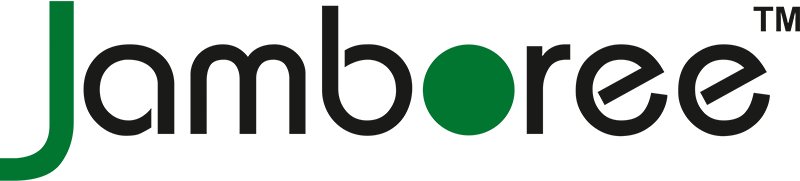
* Jamboree Education offers comprehensive classroom and online preparation programs for GMAT®, GRE®, SAT®, ACT®, TOEFL™, and IELTS™, as well as admissions counselling.
* Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

# **Business Problem**

* Jamboree recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspectiv
* They want to understand what factors are important in graduate admissions and how these factors are interrelated among themselves.
* It will also help predict one's chances of admission given the rest of the variables

# **Desired Outcome of Analysis**
* Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
* Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.
* Use Non-graphical and graphical analysis for getting inferences about variables.
* This can be done by checking the distribution of variables of graduate applicants.
* Once you’ve ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate admissions.
* Check correlation among independent variables and how they interact with each other.
* Use Linear Regression from (Statsmodel library) and explain the results.
* Test the assumptions of linear regression:
** Multicollinearity check by VIF score
** Mean of residuals
** Linearity of variables (no pattern in residual plot)
** Test for Homoscedasticity
** Normality of residuals
* Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.
* Provide actionable Insights & Recommendations
* Try out different Linear Regression

# **Loading Modules and Data**

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import spearmanr

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures

from scipy import stats
from scipy.stats import  kstest


from scipy.stats import shapiro,levene
from statsmodels.graphics.gofplots import qqplot

#from scipy.stats import mannwhitneyu

In [2]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv")

**Description of each column in data**
* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

# **Data Overview & Cleaning**

In [3]:
data.shape

(500, 9)

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

* Lets Remove the Additional space from Feature name for easy reference later on

In [6]:
data.rename(columns = {'LOR ' : 'LOR' ,'Chance of Admit ':'Chance of Admit'}, inplace = True)

In [7]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [8]:
data.index

RangeIndex(start=0, stop=500, step=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [10]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Dropping Irrelevant columns

Lets Drop the "Serial No" Fields as it just an row indicator does not help us in Predicting "Chance of Admit"


In [11]:
data.drop(["Serial No."], axis = 1,inplace= True)

In [12]:
data.shape

(500, 8)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


## Duplicate Values & Their Treatment

In [14]:
data.loc[data.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


No duplicate rows found

## Missingvalues & Their Treatment

In [15]:
data.isna().sum(axis = 0)

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

* No Missing values present in the data

## Datatype Conversion of Features

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


* All data Points are Numericals as needed for Linear Regression Model
* No need for conversion of data to Categorical type, all Numerical Data points has some ordinal Meaning

# **Statistical Analysis,Graphical Visualization & Insights**

In [17]:
data.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [18]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Univariate Analysis

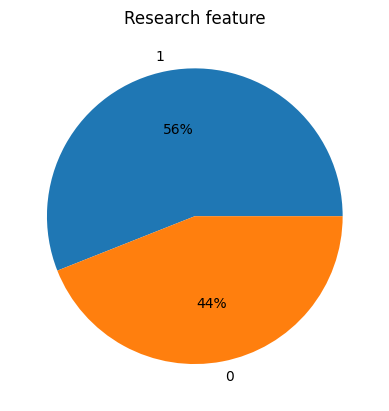

In [19]:
plt.pie(x = data["Research"].value_counts().reset_index()["Research"],
        labels = data["Research"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Research feature")
plt.show()

* 56% Students have Research Expericence
* 44% Students do have Research Experience

<Axes: xlabel='GRE Score', ylabel='count'>

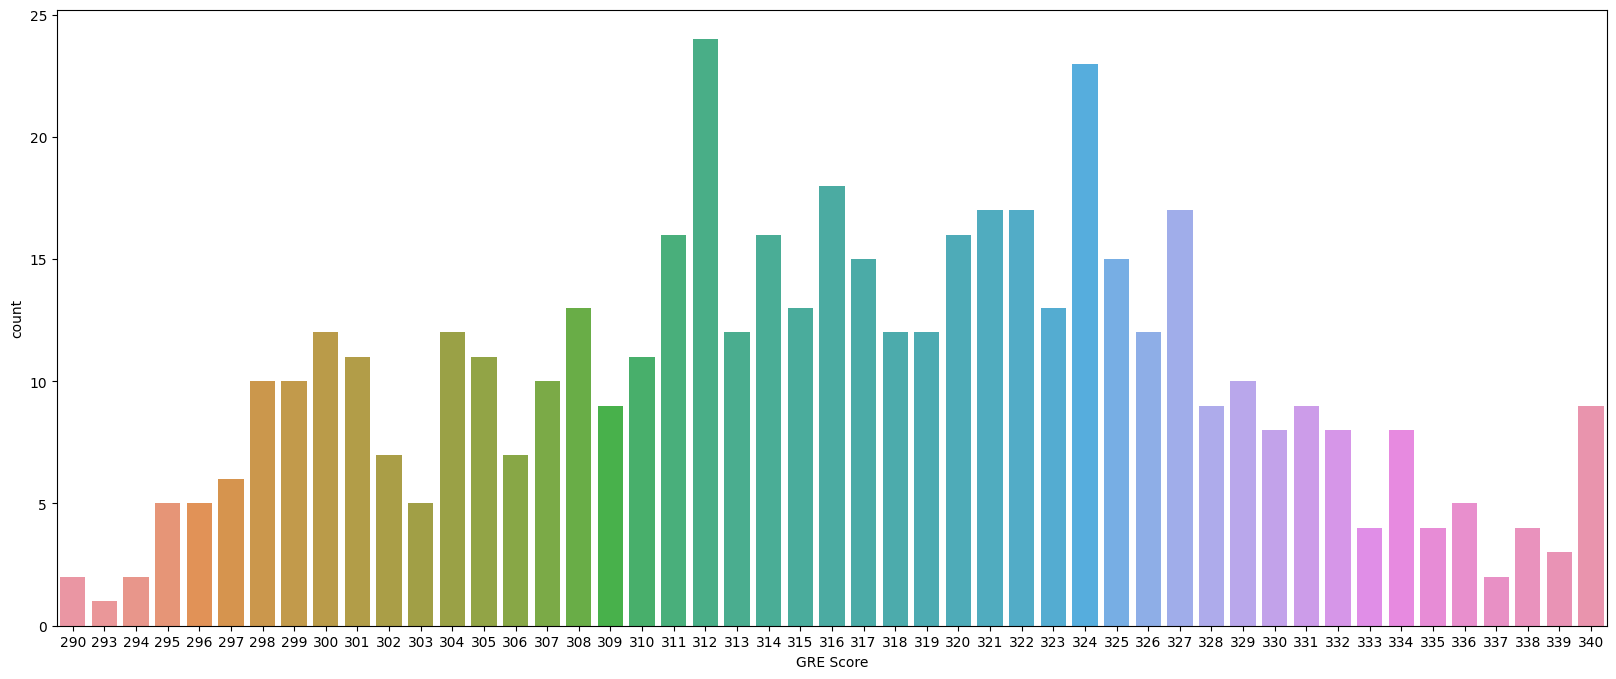

In [20]:
plt.figure(figsize = (20,8))
sns.countplot(data=data, x= "GRE Score")

* GRE Scores are greater than 290, More No of Data points are in that range 310 ~ 327

<Axes: xlabel='TOEFL Score', ylabel='count'>

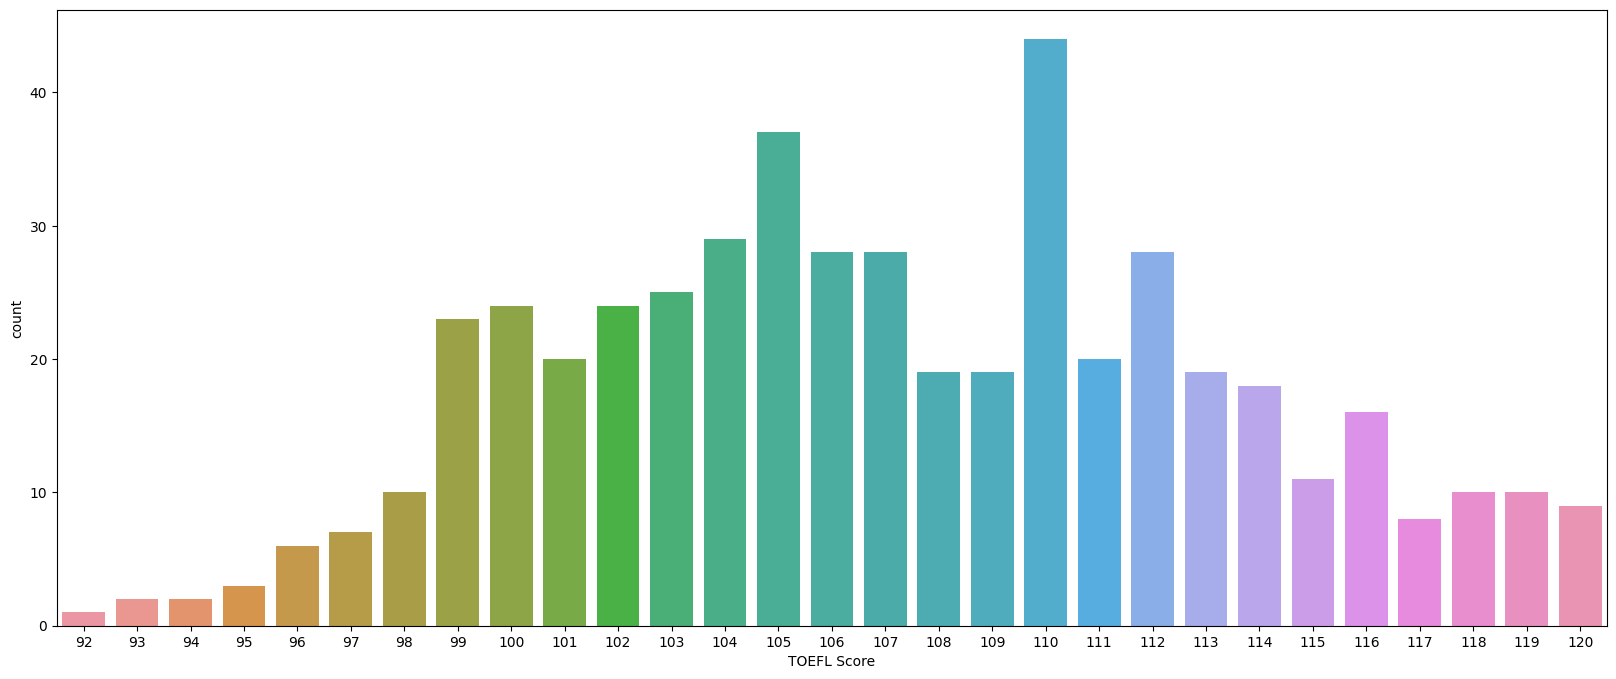

In [21]:
plt.figure(figsize = (20,8))
plt.xlim([0,340])
sns.countplot(data=data, x= "TOEFL Score")

* TOEFL Scores are greater than 91, More No of Data points are in that range 99~112

<Axes: xlabel='University Rating', ylabel='count'>

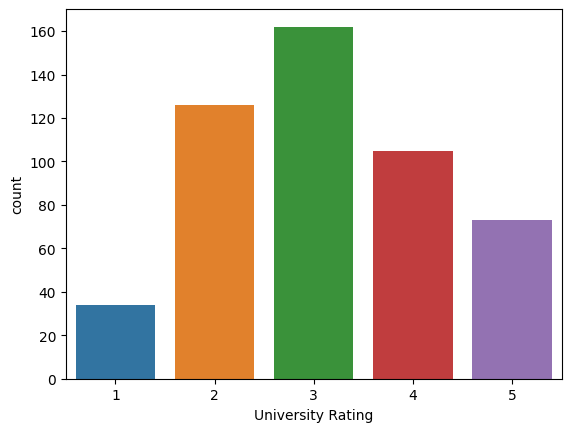

In [22]:
sns.countplot(data=data, x= 'University Rating')

* More no of Student applied for University Ranking = 3

<Axes: xlabel='LOR', ylabel='count'>

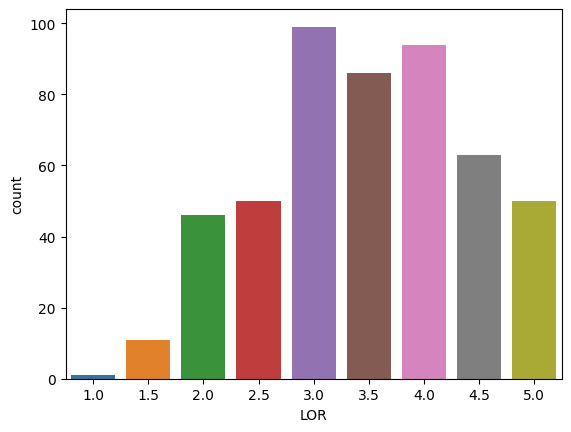

In [23]:
sns.countplot(data=data, x= 'LOR')

* LOR ranged from 1 ~ 5
* Maximum rating lies between 3 ~ 4.5

<Axes: xlabel='SOP', ylabel='count'>

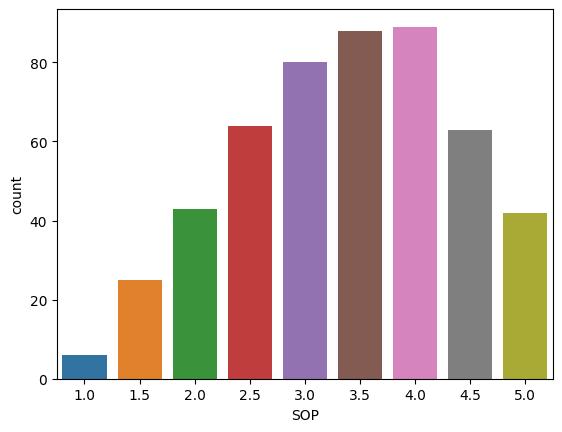

In [24]:
sns.countplot(data=data, x= 'SOP')

* SOP ranged from 1 ~ 5
* Maximum rating lies between 2.5 ~ 4.5

<Axes: xlabel='CGPA', ylabel='Count'>

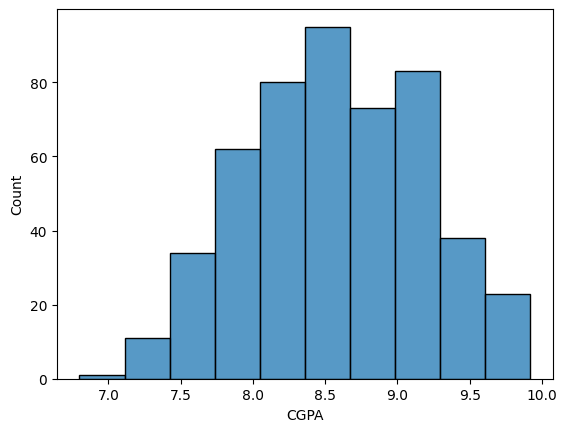

In [25]:
sns.histplot(data=data, x= 'CGPA', bins=10)

* CGPA of the Student are >= 7.0
* Maximum range lies between 7.5 ~ 9.5

<Axes: xlabel='Chance of Admit', ylabel='Count'>

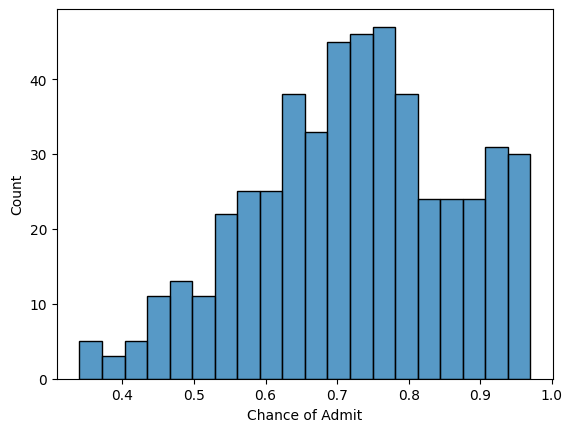

In [26]:
sns.histplot(data=data, x= 'Chance of Admit', bins=20)

## Bivariate Analysis

<Axes: xlabel='University Rating', ylabel='Chance of Admit'>

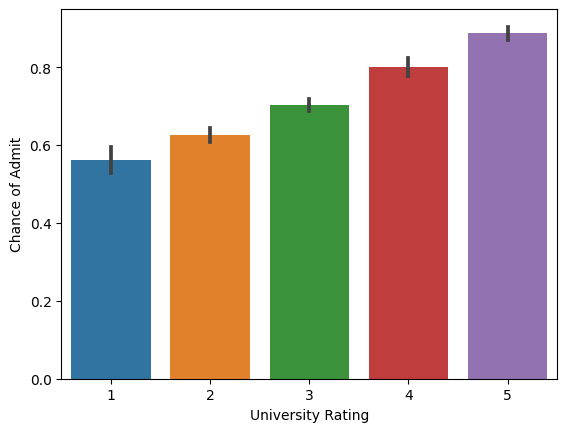

In [27]:
sns.barplot(data=data, x='University Rating',y='Chance of Admit',estimator = "mean")

<Axes: xlabel='SOP', ylabel='Chance of Admit'>

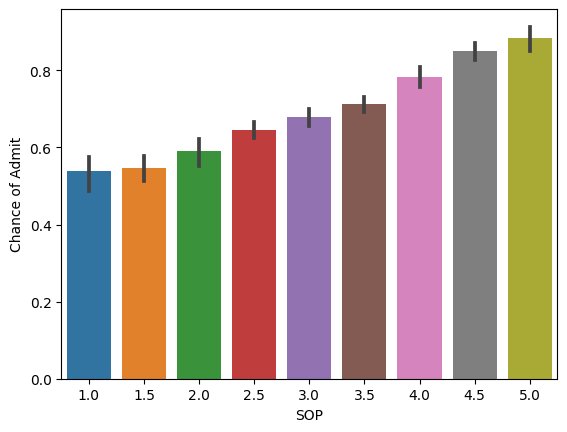

In [28]:
sns.barplot(data=data, x='SOP',y='Chance of Admit',estimator = "mean")

<Axes: xlabel='LOR', ylabel='Chance of Admit'>

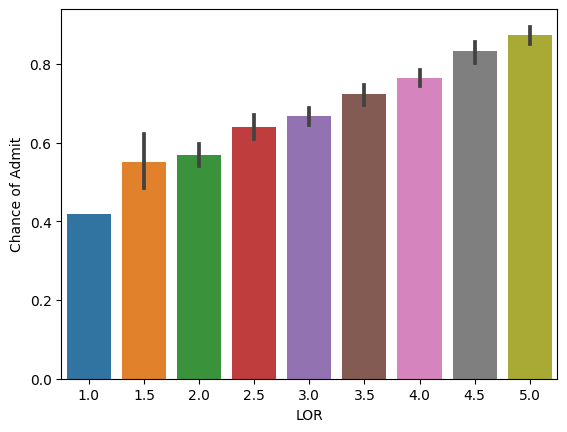

In [29]:
sns.barplot(data=data, x='LOR',y='Chance of Admit',estimator = "mean")

<Axes: xlabel='CGPA', ylabel='Chance of Admit'>

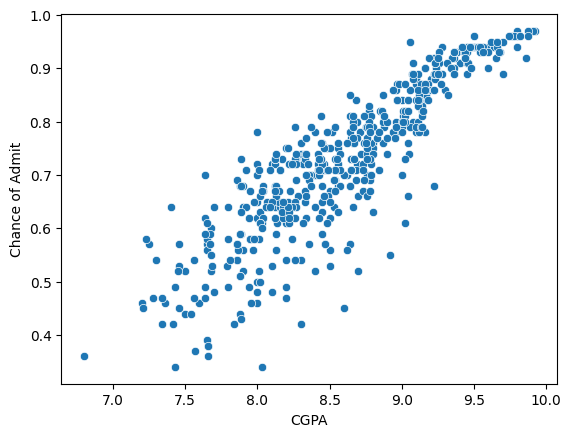

In [30]:
sns.scatterplot(data=data, x='CGPA',y='Chance of Admit')

<Axes: xlabel='GRE Score', ylabel='Chance of Admit'>

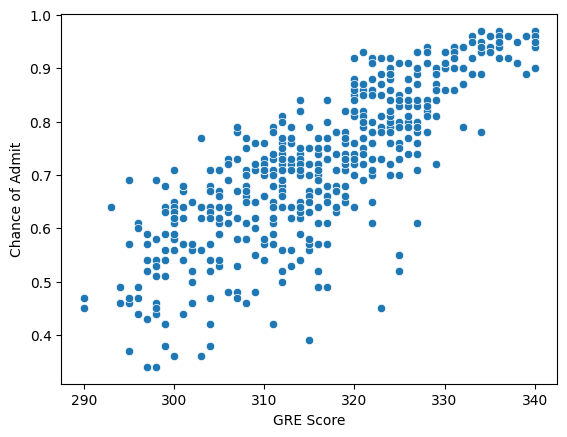

In [31]:
sns.scatterplot(data=data, x='GRE Score',y='Chance of Admit')

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit'>

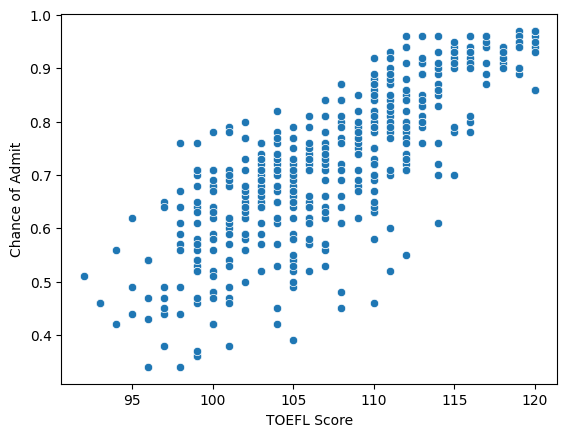

In [32]:
sns.scatterplot(data=data, x='TOEFL Score',y='Chance of Admit')

<Axes: xlabel='Research', ylabel='Chance of Admit'>

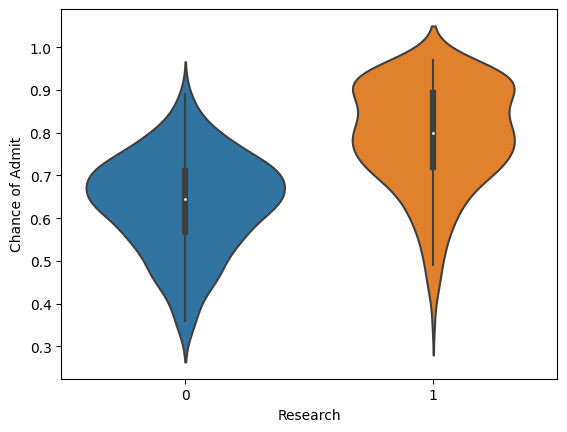

In [33]:
sns.violinplot(data = data, y = "Chance of Admit", x = "Research")

In [34]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

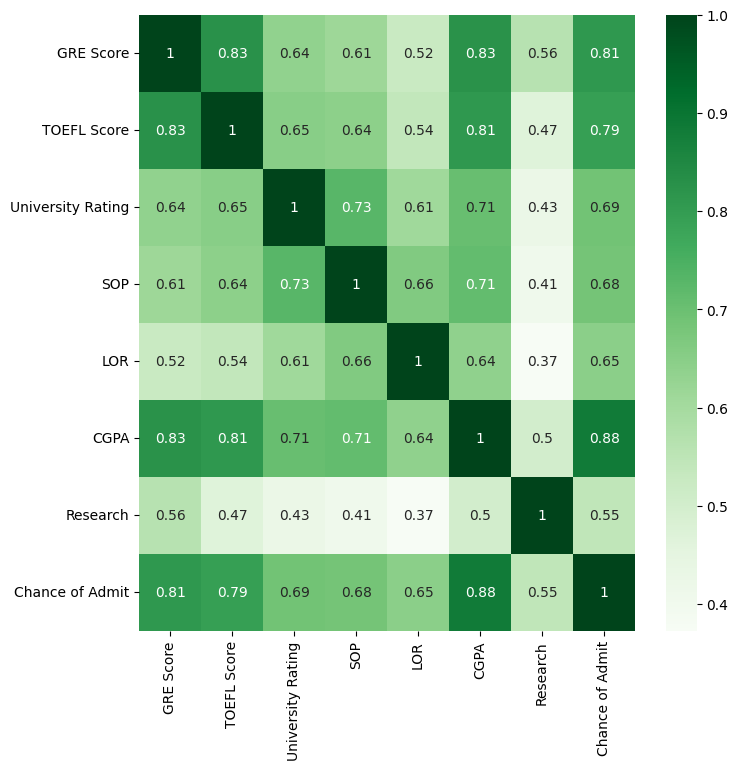

In [35]:
plt.figure(figsize =(8,8))
sns.heatmap(data.corr(),annot=True,cmap = "Greens")
plt.show()

* All features have Positive correlation with "Chance of Admit"
* CGPA[0.88],GRE Score[0.81],TOEFL Score[0.79] has very high correlation with "Chance of Admit"
* Further SOP[0.68], LOR[0.65] has almost same Correlation with ""Chance of Admit" however less than above 3"
* Least Correlation is found w.r.t Reasearch & "Chance of Admit"[0.55]

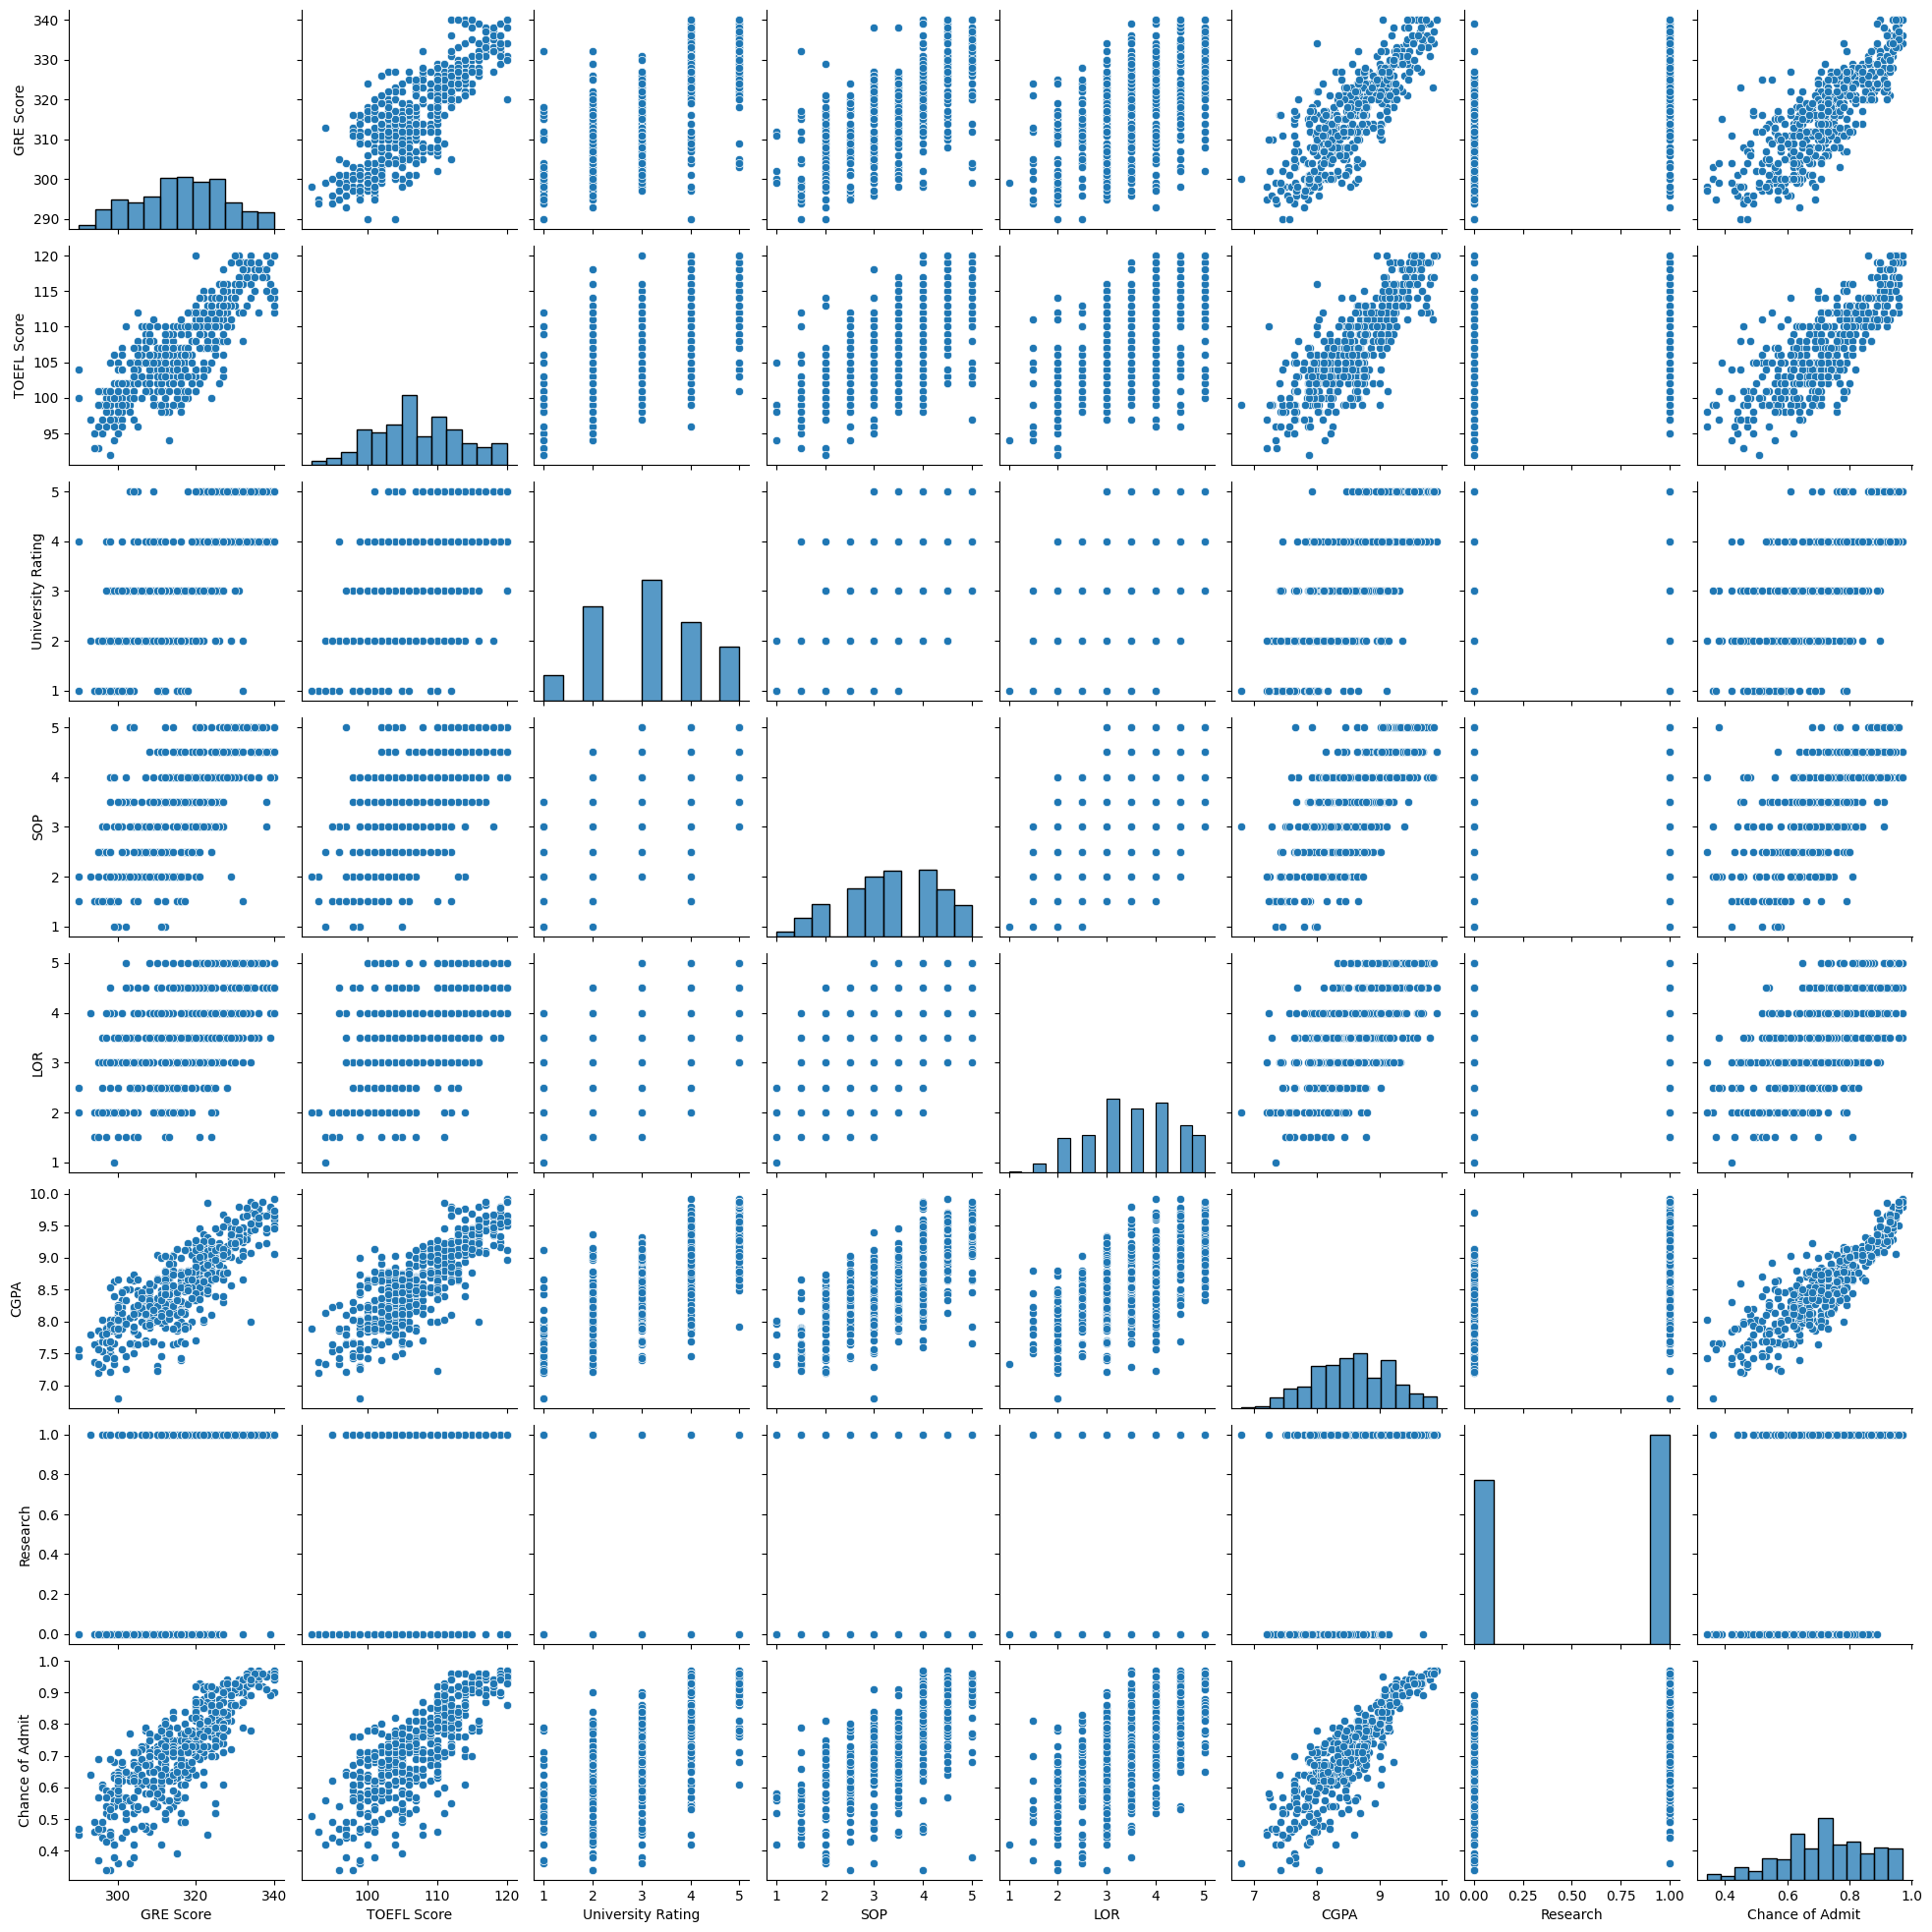

In [36]:
sns.pairplot(data=data)

* All Feautures are Positive Correlated and almost Monotonically increasing with "Change of Admit"

# **Finding & Treating Outliers Using IQR**

## IQR Analysis and Outlier Finding

* We will create a new Dataframe " outlier" which store Boolean value of IQR Analysis Result for each reading of all numerical feature columns

In [37]:
# Finding outlier for all Numerical features
outlier = pd.DataFrame() # creating as new dataframe to store outliers for each numerical feature
for z in data.columns:
    print(z,"Feature")
    print("*******************************************************************")
    IQR = np.percentile(data[z],75) - np.percentile(data[z],25)
    lower_limit = max (np.percentile(data[z],25) - 1.5*IQR,0)
    upper_limit = np.percentile(data[z],75) + 1.5*IQR
    outlier[z] = (data[z]>upper_limit) | (data[z]<lower_limit)

    print("Minimum -->",data[z].min())
    print("Lower Limit -->",lower_limit)
    print("Quantile25 -->",np.percentile(data[z],25))
    print("Median -->",np.percentile(data[z],50))
    print("Quantile75 -->",np.percentile(data[z],75))
    print("Upper Limit -->",upper_limit)
    print("Maximum -->",data[z].max())

    print()
    print("Out of ",len(data[z]), "Data points , There are",outlier[z].sum(),"Outliers")
    print("Percentage of Outliers:",np.round((outlier[z].sum()/len(data[z])*100),2),"%")
    print()
    print("*******************************************************************")

GRE Score Feature
*******************************************************************
Minimum --> 290
Lower Limit --> 282.5
Quantile25 --> 308.0
Median --> 317.0
Quantile75 --> 325.0
Upper Limit --> 350.5
Maximum --> 340

Out of  500 Data points , There are 0 Outliers
Percentage of Outliers: 0.0 %

*******************************************************************
TOEFL Score Feature
*******************************************************************
Minimum --> 92
Lower Limit --> 89.5
Quantile25 --> 103.0
Median --> 107.0
Quantile75 --> 112.0
Upper Limit --> 125.5
Maximum --> 120

Out of  500 Data points , There are 0 Outliers
Percentage of Outliers: 0.0 %

*******************************************************************
University Rating Feature
*******************************************************************
Minimum --> 1
Lower Limit --> 0
Quantile25 --> 2.0
Median --> 3.0
Quantile75 --> 4.0
Upper Limit --> 7.0
Maximum --> 5

Out of  500 Data points , There are 0 Outliers
Per

## Box-Plot for Outlier Visualization

* Let us visualize the outliers with Box plot

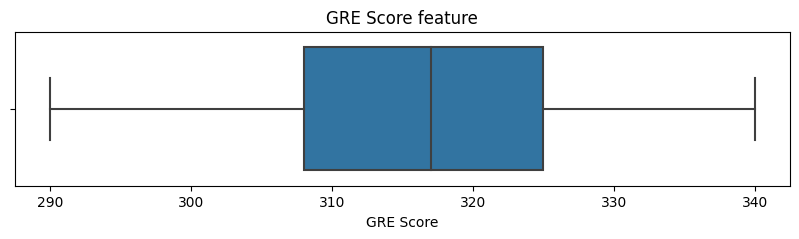

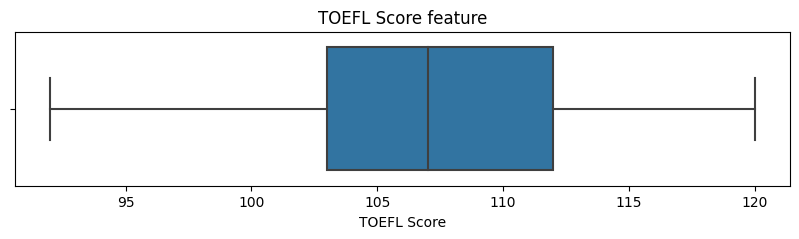

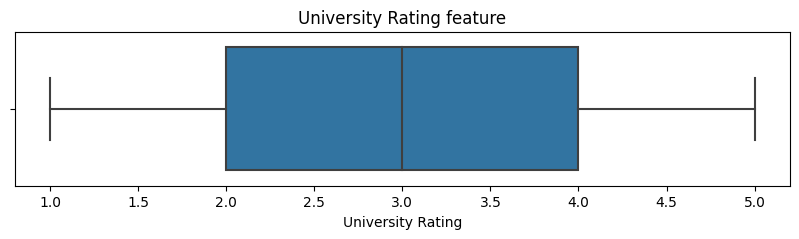

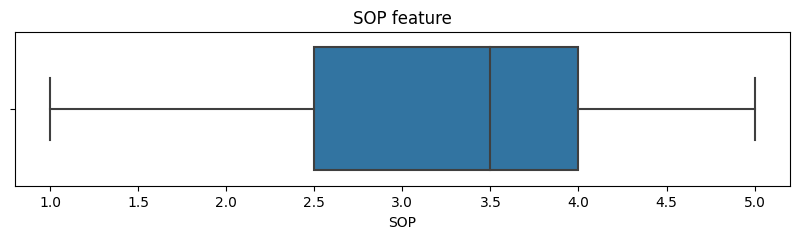

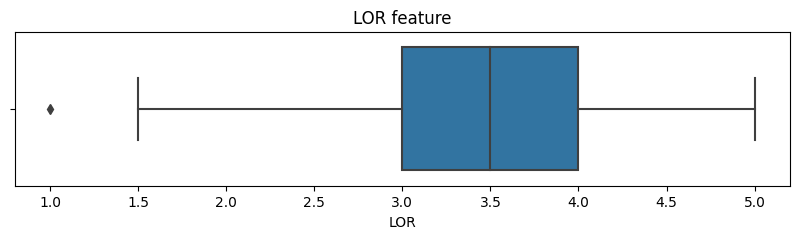

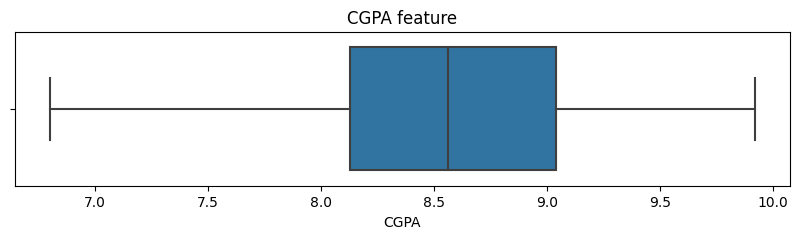

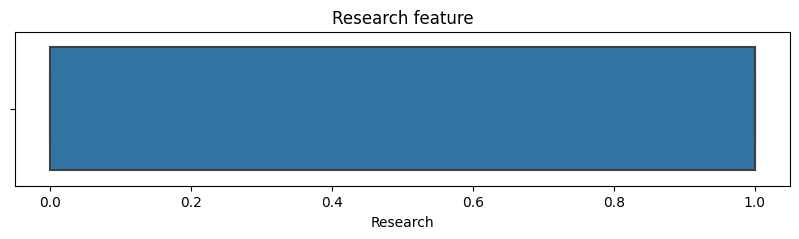

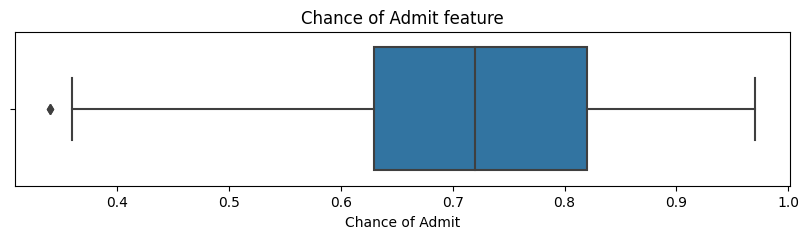

In [38]:
for z in data.columns:
  plt.figure(figsize=(10,2))
  sns.boxplot(data= data, x = z)
  plt.title(z+" feature")

## Outlier Treatment

* Lets check which Data Points are coming as Outlier, then we can decide if they have to be treated

In [39]:
outlier.shape

(500, 8)

In [40]:
data[outlier.any(axis=1)]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


* **We have 2 Outliers in "Chance of Admit" --> But as it is out Target Feature, We should not Treat it**
* But there is 1 Outlier in "LOR", we will check if it has to be treated

In [41]:
data[["LOR"]].describe()

,LOR
count,500.00000
mean,3.48400
std,0.92545
min,1.00000
25%,3.00000
50%,3.50000
75%,4.00000
max,5.00000


In [42]:
data[data["LOR"] == 1]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


* LOR ranking is out of 5, our Outlier value is 1
* LOR values as "1" is possible values, it cannot be considered as outlier
* But as we creating only Linear Regression model Futher , we will treat this outlier and Floor the value to lower limit as per the given LOR datapoints

In [43]:
data.loc[347,"LOR"] = 1.5

<Axes: xlabel='LOR'>

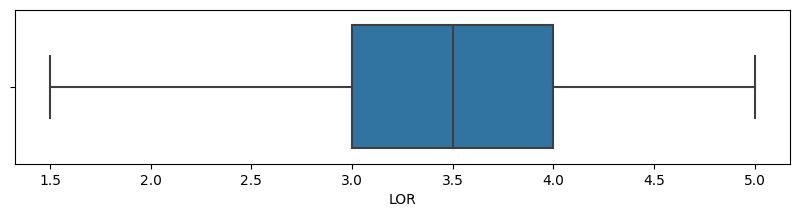

In [44]:
plt.figure(figsize=(10,2))
sns.boxplot(data=data, x= "LOR")

* 1 Outlier in LOR has been Treated, NO Oultier is visible in Box Plot

# **Hypothesis Testing**

In [48]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

* In this Data Differet test [Num-Num,Cat-Num] can be done
* But our objective to correctly predict "Chance of Admit"
* so we will do Hypothesis testing for below combinations for check if infact feature has effect on "Chance of Admit"
** GRE Score and Chance of Admit
** TOEFL Score and Change of Admit
** CGPA & Chance of Admit
** LOP & Chance of Admit
** SOP & Chance of Admit
** University Rating & Chance of Admit
** Research & Chance of Admit





## Test Set up

In this section let us fix the Confidence level & Level of Signification for our Hypothesis testing.

As this is with respect to predicting Chance_of_Admit
* let us Assume **we want 95% Confidence to reject Null Hypothesis**
* so for every Hypothesis testing, **Level of Significane will be "0.05 "**

* As our purpose of Hypothesis testing to just verify the relation of Feature not to give final judgement...We will use Non Parametric test to avoid assumptions checking
* However final judgment of impact of each feature will be given after training Linear Regression model

* As we have seen earlier in pairplot all the features are monotonically increasing w.r.t "Chance of Admit"
* for Num-Num, we will use **spearmanr test**
** H0: No correlation
** Ha: There is correlation

## Testing

In [62]:
for i in data.columns[:-2]:
  spearman_coeff, p_value = spearmanr(data[i], data["Chance of Admit"])
  print("*******************************")
  print(p_value)
  if p_value < 0.05:
    print("Reject H0")
    print(i,"is correlated to Chance_of_admit")
  else:
    print("Fail to reject H0")
    print(i,"is not correlated to Chance_of_admit")

*******************************
5.734552105475668e-124
Reject H0
GRE Score is correlated to Chance_of_admit
*******************************
1.504956427966445e-109
Reject H0
TOEFL Score is correlated to Chance_of_admit
*******************************
5.889500555297506e-76
Reject H0
University Rating is correlated to Chance_of_admit
*******************************
1.1336315351749534e-75
Reject H0
SOP is correlated to Chance_of_admit
*******************************
8.172072041088856e-60
Reject H0
LOR is correlated to Chance_of_admit
*******************************
7.372294266325021e-171
Reject H0
CGPA is correlated to Chance_of_admit


* From Hypothesis testing, we can say all feature are correlated to "Chance of Admit"

# **Feature Engineering**

### Eliminate Reduntant features

* No Reduntant Feature available,
* From Hypothesis Testing we can say all feature are useful Predictor of "Chance of Admit"

## Encoding : Non-Numerical to Numerical

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


* All data points are numerical only
* So need for conversion to Numerical

## Scaling of Numerical Categories

* Before scaling let us note down Maximum and Minimum values possible for given feature( not maximum and Minimum of Features in data given)
* Further we will use the these Maximum & Minimum values for Scaling

In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

* GRE Score : 260 ~ 340
* TOEFL Score : 0 ~ 120
* University Rating : 1 ~ 5
* SOP : 1 ~ 5
* LOR : 1 ~ 5
* CGPA : 0 ~ 10
* Chance of Admit : 0 ~ 1

* if we use MinmaxScaler --> It will take Minimum & maximum values of Data points in the feature only, then if we want to check our model for any new data point out the given data set, it might not give good result
* for E.g. if MinmaxScaler used on GRE Score : [290 ~ 340] will become [0 ~ 1], but if new Data point has GRE Score as 280 --> It will be considered as -0.2 which is not between [0,1]
* So we will Scale the score using Feature wise possible Maximum and Minimum values

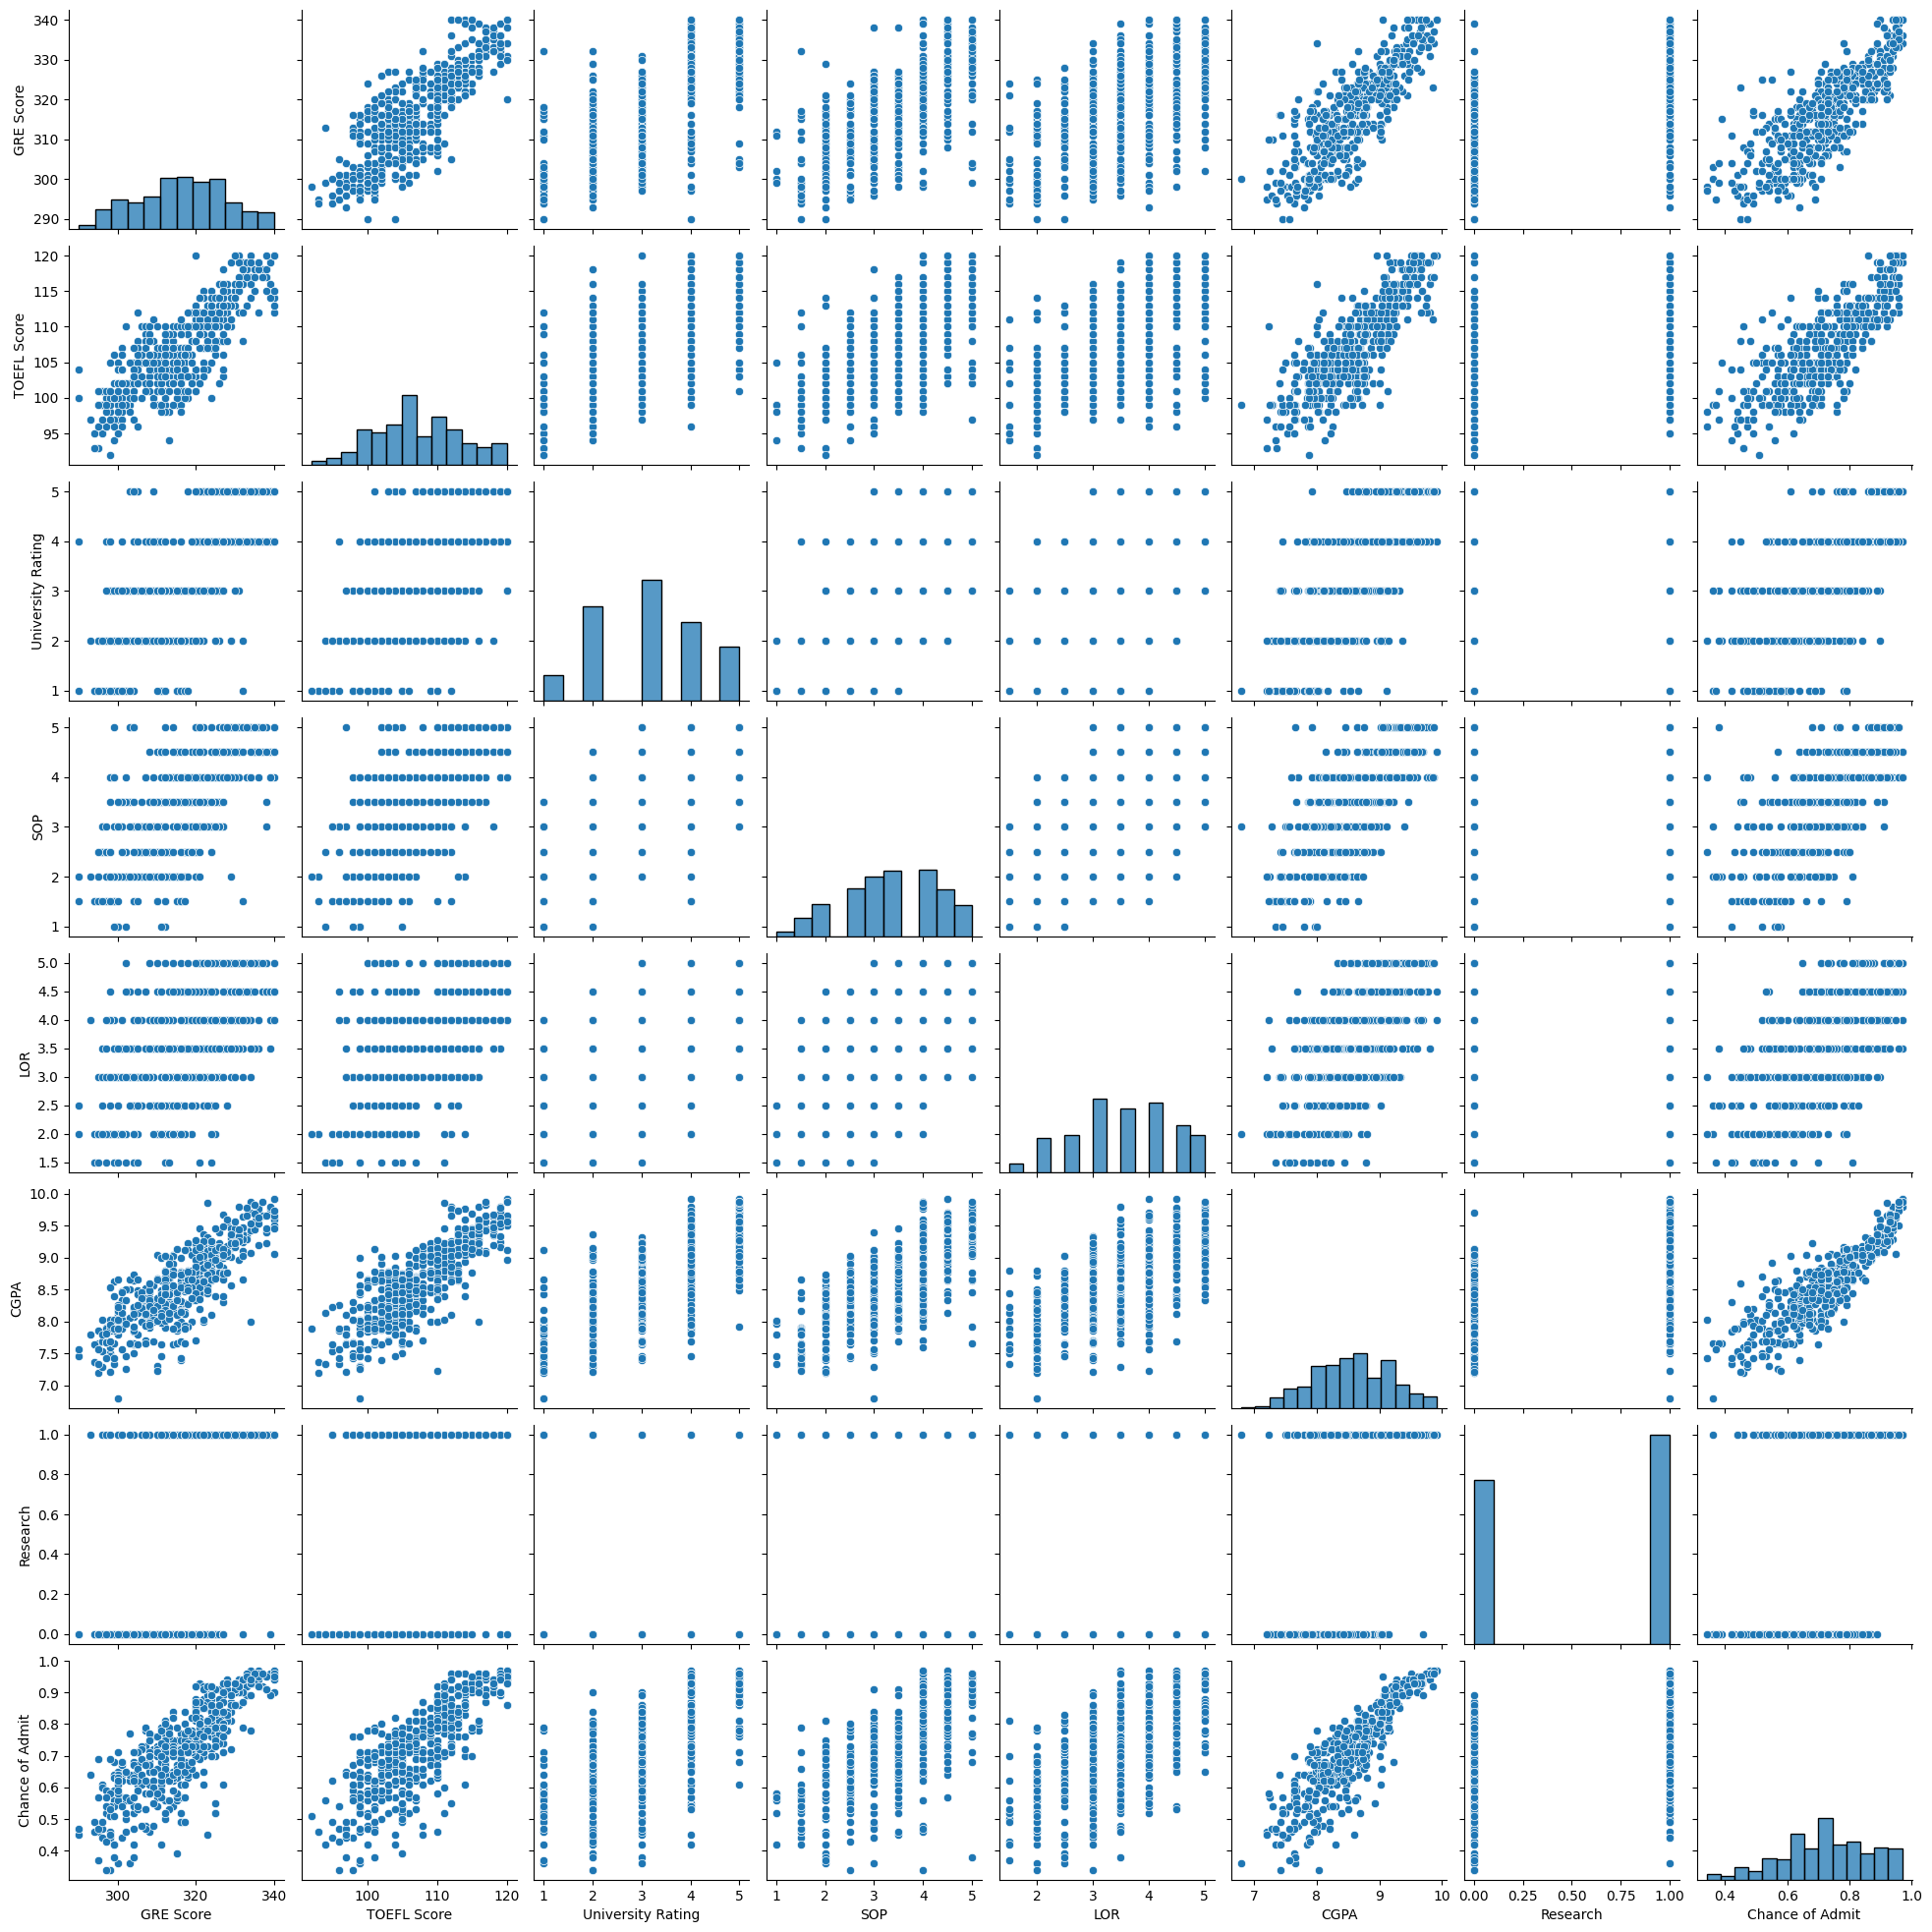

In [64]:
sns.pairplot(data)

### Normalization with Feature wise Max and Min Possible values

* Before Directly Doing Normalization, Let's check if the data follows normal Distribution
* If it follows, we will do Standardization, as it will reduce the Computational load as we know from PCA derivation
* We will check Normal distribution using QQ Plots

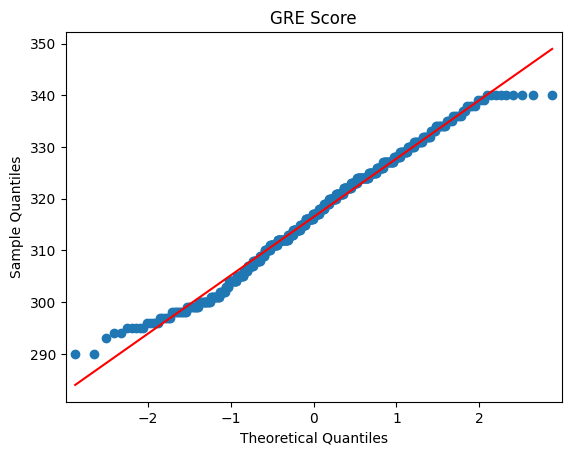

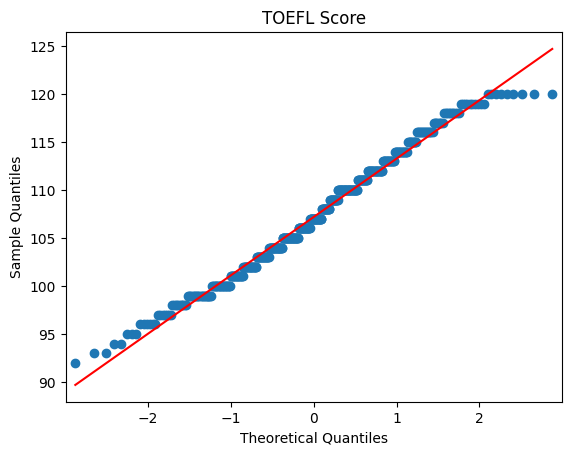

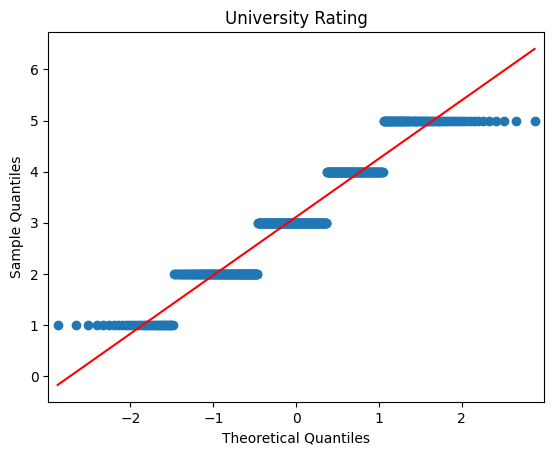

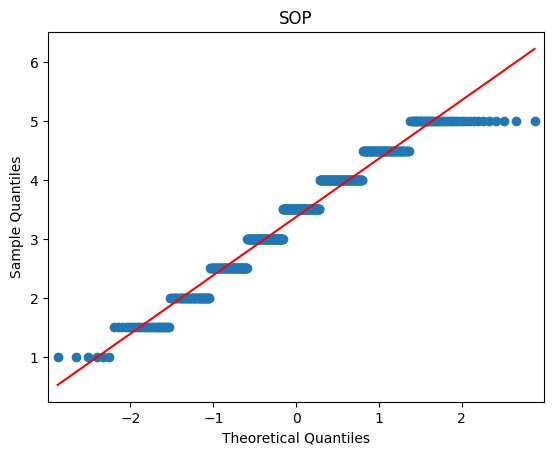

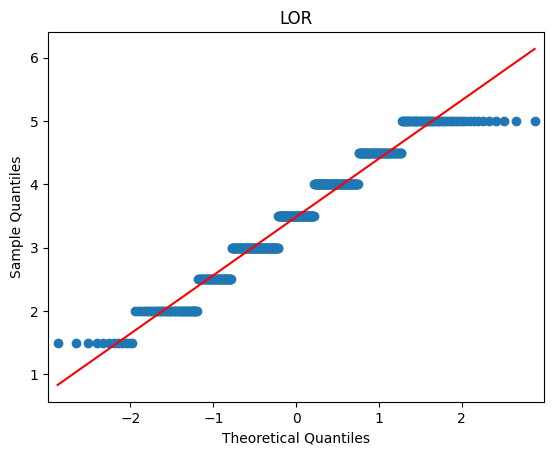

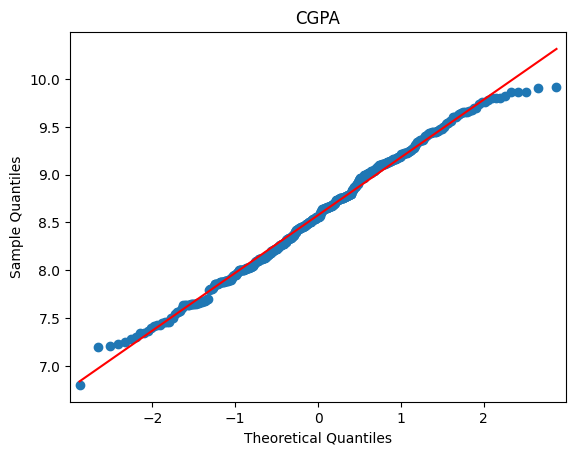

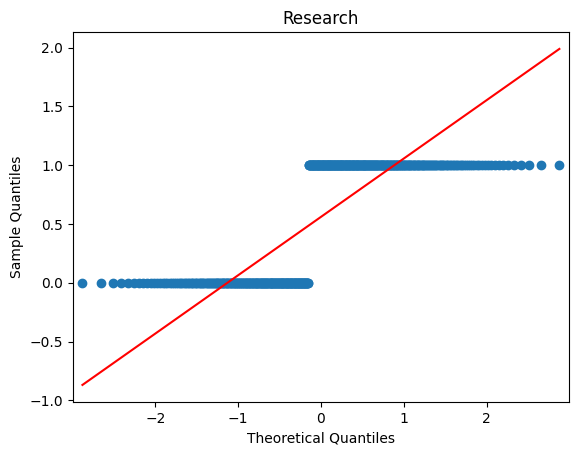

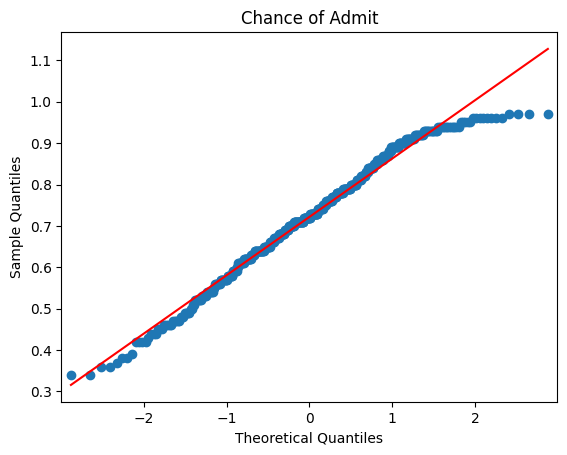

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in data.columns:
   qqplot(data[i], line="s")
   plt.title(i)
   plt.show()

* Let us do KS test for Goodness of Fit for Normal Distribution also

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in data.columns:
  test_stat, p_value = kstest(data[i],stats.norm.cdf)
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(i,"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(i,"Data is Gaussian")
  print()

0.0
Reject H0
GRE Score Data is Not Gaussian

0.0
Reject H0
TOEFL Score Data is Not Gaussian

0.0
Reject H0
University Rating Data is Not Gaussian

0.0
Reject H0
SOP Data is Not Gaussian

0.0
Reject H0
LOR Data is Not Gaussian

0.0
Reject H0
CGPA Data is Not Gaussian

4.1132799581816557e-116
Reject H0
Research Data is Not Gaussian

1.5256082690083004e-204
Reject H0
Chance of Admit Data is Not Gaussian



* we have observed that All the Numericals are not following Normal Distribution, so we cannot do Stadardization
* Now we will do Normalization using transform() on each series



In [ ]:
scaleddata = data.copy()

In [ ]:
scaleddata["GRE Score"] = scaleddata["GRE Score"].transform(lambda x : (x-260)/(340-260))
scaleddata["TOEFL Score"] = scaleddata["TOEFL Score"].transform(lambda x : (x-0)/(120-0))
scaleddata["University Rating"] = scaleddata["University Rating"].transform(lambda x : (x-0)/(5-0))
scaleddata["SOP"] = scaleddata["SOP"].transform(lambda x : (x-0)/(5-0))
scaleddata["LOR"] = scaleddata["LOR"].transform(lambda x : (x-0)/(5-0))
scaleddata["CGPA"] = scaleddata["CGPA"].transform(lambda x : (x-0)/(10-0))

In [ ]:
scaleddata

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.9625,0.983333,0.8,0.9,0.9,0.965,1,0.92
1,0.8000,0.891667,0.8,0.8,0.9,0.887,1,0.76
2,0.7000,0.866667,0.6,0.6,0.7,0.800,1,0.72
3,0.7750,0.916667,0.6,0.7,0.5,0.867,1,0.80
4,0.6750,0.858333,0.4,0.4,0.6,0.821,0,0.65
...,...,...,...,...,...,...,...,...
495,0.9000,0.900000,1.0,0.9,0.8,0.902,1,0.87
496,0.9625,0.975000,1.0,1.0,1.0,0.987,1,0.96
497,0.8750,1.000000,1.0,0.9,1.0,0.956,1,0.93
498,0.6500,0.858333,0.8,0.8,1.0,0.843,0,0.73


In [ ]:
scaleddata.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,0.705900,0.893267,0.622800,0.674800,0.697000,0.857644,0.560000,0.72174
std,0.141189,0.050682,0.228702,0.198201,0.184605,0.060481,0.496884,0.14114
min,0.375000,0.766667,0.200000,0.200000,0.300000,0.680000,0.000000,0.34000
25%,0.600000,0.858333,0.400000,0.500000,0.600000,0.812750,0.000000,0.63000
50%,0.712500,0.891667,0.600000,0.700000,0.700000,0.856000,1.000000,0.72000
75%,0.812500,0.933333,0.800000,0.800000,0.800000,0.904000,1.000000,0.82000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.992000,1.000000,0.97000


### Normalization using MinmaxScaler

In [63]:
Normscaler = MinMaxScaler()

In [65]:
scaleddata = Normscaler.fit_transform(data)

In [66]:
scaleddata

array([[0.94      , 0.92857143, 0.75      , ..., 0.91346154, 1.        ,
        0.92063492],
       [0.68      , 0.53571429, 0.75      , ..., 0.66346154, 1.        ,
        0.66666667],
       [0.52      , 0.42857143, 0.5       , ..., 0.38461538, 1.        ,
        0.6031746 ],
       ...,
       [0.8       , 1.        , 1.        , ..., 0.88461538, 1.        ,
        0.93650794],
       [0.44      , 0.39285714, 0.75      , ..., 0.5224359 , 0.        ,
        0.61904762],
       [0.74      , 0.75      , 0.75      , ..., 0.71794872, 0.        ,
        0.79365079]])

In [67]:
scaleddata = pd.DataFrame(scaleddata,columns = data.columns)

In [68]:
scaleddata

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.857143,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.857143,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.571429,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.285714,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.428571,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.714286,0.711538,1.0,0.841270
496,0.94,0.892857,1.00,1.000,1.000000,0.983974,1.0,0.984127
497,0.80,1.000000,1.00,0.875,1.000000,0.884615,1.0,0.936508
498,0.44,0.392857,0.75,0.750,1.000000,0.522436,0.0,0.619048


In [69]:
scaleddata.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.529440,0.542571,0.528500,0.593500,0.567143,0.569372,0.560000,0.605937
std,0.225903,0.217210,0.285878,0.247751,0.263722,0.193850,0.496884,0.224032
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360000,0.392857,0.250000,0.375000,0.428571,0.425481,0.000000,0.460317
50%,0.540000,0.535714,0.500000,0.625000,0.571429,0.564103,1.000000,0.603175
75%,0.700000,0.714286,0.750000,0.750000,0.714286,0.717949,1.000000,0.761905
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Final data - Dividing Data for Training & Test

* Our desired Outcome is "Chance of Admit"
* So we will divide our scaleddata into X,y
* we will use 80:20 ratio for train & test
* Further we will Divide X & y as below data sets
** Xtrain
** Xtest
** ytrain
** ytest

In [70]:
Xtrain, Xtest, ytrain, ytest = train_test_split(scaleddata.drop(["Chance of Admit"], axis = 1), scaleddata["Chance of Admit"], test_size=0.2, random_state=2)

In [71]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((400, 7), (100, 7), (400,), (100,))

# **Model Training - Linear Regression[OLS]**

In [72]:
Xtrain1 = sm.add_constant(Xtrain)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(ytrain, Xtrain1)
results = model.fit()

In [73]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     272.0
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          3.48e-146
Time:                        09:14:10   Log-Likelihood:                 388.56
No. Observations:                 400   AIC:                            -761.1
Df Residuals:                     392   BIC:                            -729.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0224      0.01

## Model Results

In [74]:
# Calculating the Predicted Values (yhat) of training data
yhattrain = results.predict(Xtrain1)

In [75]:
# Calculating the Predicted Values (yhat) of testing data
Xtest1 = sm.add_constant(Xtest)
yhattest = results.predict(Xtest1)

In [79]:
results.params.sort_values(ascending = False)

CGPA                 0.561533
GRE Score            0.169155
TOEFL Score          0.131429
LOR                  0.103283
Research             0.039244
University Rating    0.030733
const                0.022418
SOP                  0.013592
dtype: float64

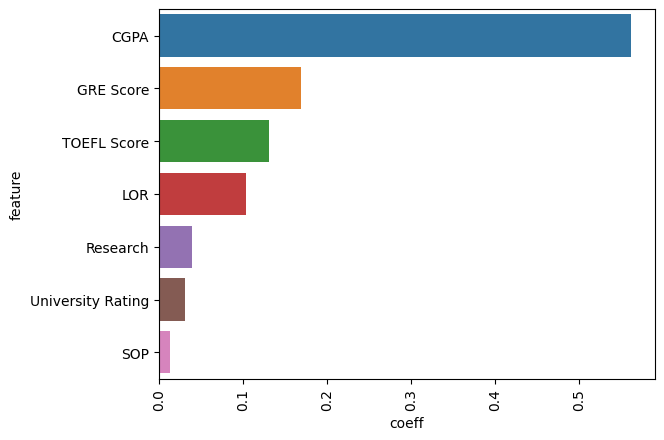

In [77]:
weights = pd.DataFrame(list(zip(Xtest.columns,np.abs(results.params[1:]))),
                   columns=['feature', 'coeff'])
weights.sort_values(by = "coeff", ascending = False, inplace = True)
sns.barplot(y='feature', x='coeff', data=weights)
plt.xticks(rotation=90)
plt.show()

* CGPA is the most important Feature for predicting "Chance of Admit"
* Next comes TOEFL Score, GRE Score, LOR
* Research, University Rating & SOP has least effect for Predicting "Chance of Admit"

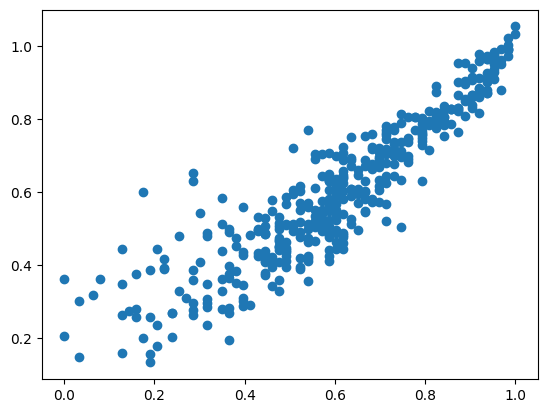

In [81]:
plt.scatter(ytrain, yhattrain)

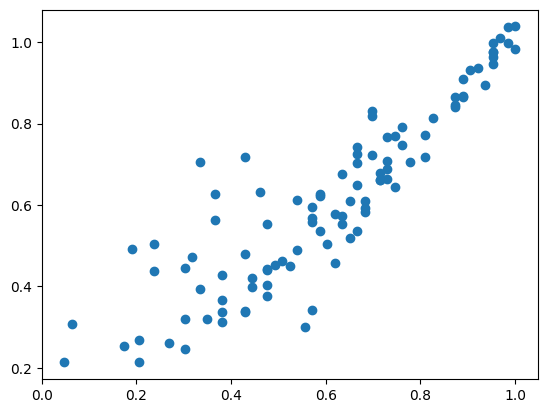

In [82]:
plt.scatter(ytest, yhattest)

* lets check R-square of Testing & Training data

## R-Square

In [94]:
# R-square Using OLS Attribute for Training data
results.rsquared

0.8292848575410212

In [95]:
# R-square for training data
1 - np.sum((ytrain - yhattrain)**2)/np.sum((ytrain - ytrain.mean())**2)

0.8292848575410212

In [96]:
# R-square for testing data
1 - np.sum((ytest - yhattest)**2)/np.sum((ytest - ytest.mean())**2)

0.7927364356781469

* From R-square Values of Test & Train Data, we can say model is neither Overfit nor Underfit
* It is appropriately Fit

## R-Square Adjusted

In [108]:
# used defined function for R-Square Adjusted
def R2adj(X,R2):
  return (1 - (1-R2) * ((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)))

In [110]:
R2adj(Xtrain,results.rsquared)

0.8262363728542538

In [83]:
# R-square adjusted Using OLS Attribute for Training data
results.rsquared_adj

0.8262363728542538

In [84]:
# R-square adjusted for training data
R2= 1 - np.sum((ytrain - yhattrain)**2)/np.sum((ytrain - ytrain.mean())**2)
1 - (1-R2) * ((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1))

0.8262363728542538

In [85]:
# R-square adjusted for testing data
R2= 1 - np.sum((ytest - yhattest)**2)/np.sum((ytest - ytest.mean())**2)
1 - (1-R2) * ((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1))

0.7769663818710494

* From Comparison of R-Square and R-Square Adjusted, we see difference b/w R-Square & R-Square adj for Training [0.829 - 0.826 = 0.003] , for testing [ 0.792 - 0.776 = 0.016] is very small
* So we can conclude there are no irrelevant features inline with our earlier Hypothesis Testing

## Mean Absolute Error

In [86]:
# MAE for Training data
(np.sum(np.abs(ytrain-yhattrain)))/len(ytrain)

0.06568270842637872

In [87]:
# MAE for testing data
(np.sum(np.abs(ytest-yhattest)))/len(ytest)

0.07509931877554368

## Root Mean Square Error

In [88]:
# RMSE for Training data
((np.sum((ytrain-yhattrain)**2))**0.5)/len(ytrain)

0.004579977329232789

In [89]:
# RMSE for testing data
((np.sum((ytest-yhattest)**2))**0.5)/len(ytest)

0.010564357955452694

# **Model Training - Linear Regression[Lasso]**

In [101]:
model1 = Lasso(alpha=0.001)
model1.fit(Xtrain,ytrain)
print(model1.intercept_)
print(model1.coef_)

0.039318412033067296
[0.16382682 0.1281977  0.03503942 0.01003746 0.09923254 0.54148231
 0.04134872]


In [102]:
model1.score(Xtrain, ytrain)

0.828678111577849

In [103]:
model1.score(Xtest, ytest)

0.7944094303236864

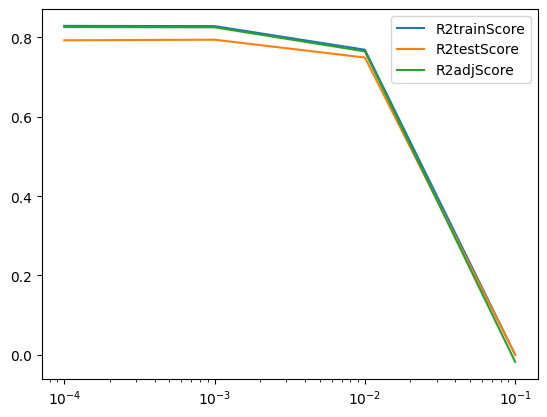

In [114]:
R2testScore = []
R2trainScore = []
R2adjScore=[]
hyperparameter = [0.0001,0.001,0.01,0.1]
for i in hyperparameter:
  model1 = Lasso(alpha=i)
  model1.fit(Xtrain,ytrain)

  R2 = model1.score(Xtrain,ytrain)
  R2trainScore.append(R2)
  R2testScore.append(model1.score(Xtest,ytest))
  R2adjScore.append(R2adj(Xtrain,R2))

sns.lineplot(x=hyperparameter, y=R2trainScore, label = "R2trainScore")
sns.lineplot(x=hyperparameter, y=R2testScore , label = "R2testScore")
sns.lineplot(x=hyperparameter, y=R2adjScore , label = "R2adjScore")
plt.xscale('log')
plt.show()

* Lasso Linear_Regression is giving slightly better results with very low Hyperparamter values
* we are are getting R-Square Detoriated with increase in L1 Regularization constant
* Meaning with our Earlier Linear Regression Model was good with Given 7 features, further by increasing Regularization we are detoriating our model by underfitting

# **Model Training - Linear Regression[Ridge]**

In [115]:
model2 = Ridge(alpha = 1)
model2.fit(Xtrain,ytrain)
print(model2.intercept_)
print(model2.coef_)

0.03944401101868844
[0.18741999 0.15553037 0.04415097 0.02990265 0.10977695 0.45177796
 0.04327336]


In [116]:
model2.score(Xtrain, ytrain)

0.8272275566801526

In [117]:
model2.score(Xtest, ytest)

0.7882522485158407

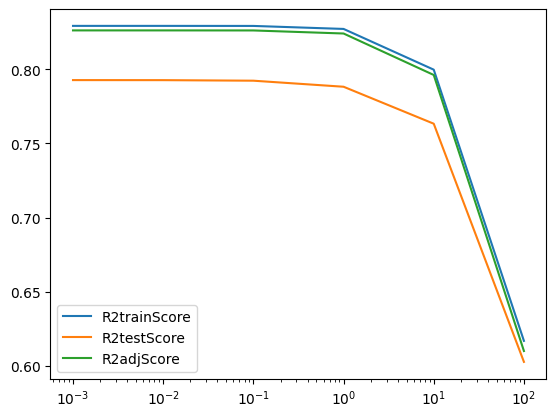

In [119]:
R2testScore = []
R2trainScore = []
R2adjScore=[]
hyperparameter = [0.001,0.01,0.1,1,10,100]
for i in hyperparameter:
  model2 = Ridge(alpha=i)
  model2.fit(Xtrain,ytrain)

  R2 = model2.score(Xtrain,ytrain)
  R2trainScore.append(R2)
  R2testScore.append(model2.score(Xtest,ytest))
  R2adjScore.append(R2adj(Xtrain,R2))

sns.lineplot(x=hyperparameter, y=R2trainScore, label = "R2trainScore")
sns.lineplot(x=hyperparameter, y=R2testScore , label = "R2testScore")
sns.lineplot(x=hyperparameter, y=R2adjScore , label = "R2adjScore")
plt.xscale('log')
plt.show()

* we are are getting R-Square Detoriated with increase in L2 Regularization constant
* Meaning with our Earlier Linear Regression Model was good with Given 7 features, further by increasing Regularization we are detoriating our model by underfitting
* so now we will use Polynomial Feature and check if our Linear Regression Model can be further Increased

# **Polynomial Regression**

* Let us check if Different Polynomial will increase Rsquare & Rsquare_adj

In [123]:
np.arange(1,7)

array([1, 2, 3, 4, 5, 6])

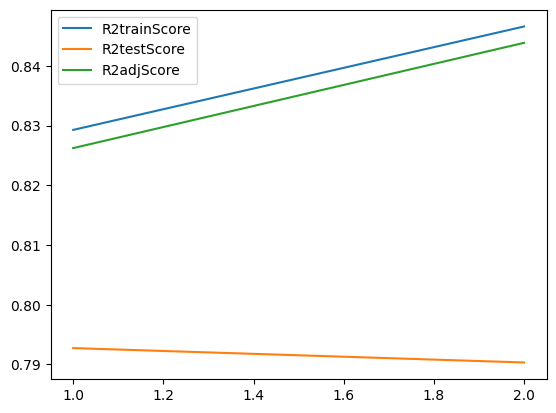

In [128]:
R2testScore = []
R2trainScore = []
R2adjScore=[]
poly_hyper = np.arange(1,3)
for i in poly_hyper:
  poly = PolynomialFeatures(i)
  Xtrainpoly = poly.fit_transform(Xtrain)
  Xtestpoly = poly.fit_transform(Xtest)
  model4 = LinearRegression()
  model4.fit(Xtrainpoly,ytrain)

  R2 = model4.score(Xtrainpoly,ytrain)
  R2trainScore.append(R2)
  R2testScore.append(model4.score(Xtestpoly,ytest))
  R2adjScore.append(R2adj(Xtrain,R2))

sns.lineplot(x=poly_hyper, y=R2trainScore, label = "R2trainScore")
sns.lineplot(x=poly_hyper, y=R2testScore , label = "R2testScore")
sns.lineplot(x=poly_hyper, y=R2adjScore , label = "R2adjScore")
plt.show()

In [ ]:
R2trainScore=[]
R2testScore=[]
R2adjtrainScore = []
X = data.drop(["Chance of Admit"], axis = 1)
y = data["Chance of Admit"]
for i in range(1,5):
  poly = PolynomialFeatures(i)
  Xpoly = poly.fit_transform(X)
  Normscaler = MinMaxScaler()
  scaledXpoly = Normscaler.fit_transform(Xpoly)

  Xtrain, Xtest, ytrain, ytest = train_test_split(scaledXpoly, y, test_size=0.2, random_state=2)
  Xtestpoly = poly.fit_transform(Xtest)
  model4 = LinearRegression()
  model4.fit(Xtrain,ytrain)
  R2 = model4.score(Xtrain,ytrain)
  R2trainScore.append(R2)
  R2adjtrainScore.append((1 - (1-R2) * ((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1))))
  R2testScore.append(model4.score(Xtest,ytest))

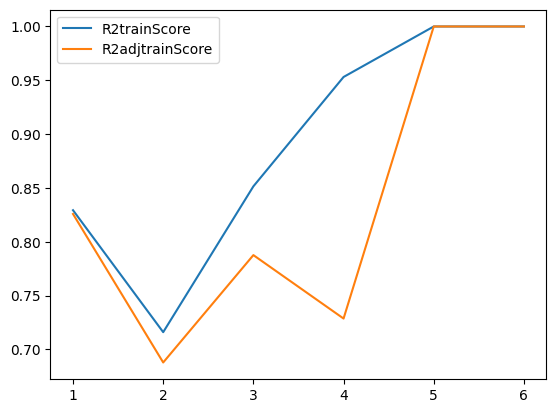

In [ ]:
sns.lineplot(x=np.arange(1,7), y=R2trainScore, label = "R2trainScore")
sns.lineplot(x=np.arange(1,7), y=R2adjtrainScore , label = "R2adjtrainScore")
plt.show()

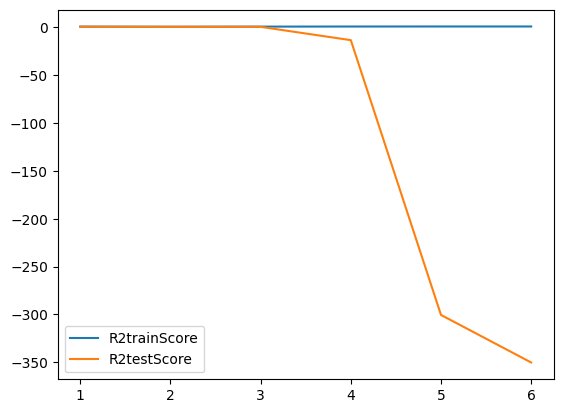

In [ ]:
sns.lineplot(x=np.arange(1,7), y=R2trainScore, label = "R2trainScore")
sns.lineplot(x=np.arange(1,7), y=R2testScore , label = "R2testScore")
plt.show()

In [ ]:
R2trainScore

[0.8292848575410212,
 0.7159751219943793,
 0.8514607669622795,
 0.9530698707269925,
 1.0,
 1.0]

In [ ]:
R2adjtrainScore

[0.825791964600684,
 0.6878073654979542,
 0.7875729247955179,
 0.7286214263778259,
 1.0,
 1.0]

In [ ]:
R2testScore

[0.792736435678147,
 0.6681117315182176,
 0.6093621712447559,
 -13.29234121745116,
 -300.5896666152779,
 -350.2750560013047]

* Definetely with use of Polynomial X, Model is Over fitting
* we will have to use regulaization, so we will use Ridge

In [ ]:
R2trainScore=np.zeros([6,6])
R2testScore= np.zeros([6,6])
R2adjtrainScore = np.zeros([6,6])
for i in range(1,7):
  poly = PolynomialFeatures(i)
  Xtrainpoly = poly.fit_transform(Xtrain)
  Xtestpoly = poly.fit_transform(Xtest)
  for j in range(1,7):
    model5 = Ridge(alpha = j)
    model5.fit(Xtrainpoly,ytrain)
    R2 = model5.score(Xtrainpoly,ytrain)
    R2trainScore[i-1][j-1] = R2
    R2adjtrainScore[i-1][j-1] = ((1 - ((1-R2) * ((Xtrainpoly.shape[0]-1)/(Xtrainpoly.shape[0]-Xtrainpoly.shape[1]-1)))))
    R2testScore[i-1][j-1] = (model5.score(Xtestpoly,ytest))

In [ ]:
R2trainScore

array([[0.79687427, 0.77955226, 0.76677938, 0.75619787, 0.74702864,
        0.73886741],
       [0.82561742, 0.81823326, 0.81253425, 0.80791434, 0.80402095,
        0.80063612],
       [0.83255246, 0.82780645, 0.82444488, 0.82167028, 0.81924838,
        0.81707799],
       [0.83770864, 0.83319803, 0.83019078, 0.82786385, 0.82592682,
        0.82424351],
       [0.84163294, 0.8375332 , 0.83469506, 0.83248519, 0.83065963,
        0.82909371],
       [0.84442262, 0.84070408, 0.83816909, 0.83615272, 0.83445375,
        0.83297716]])

<Axes: >

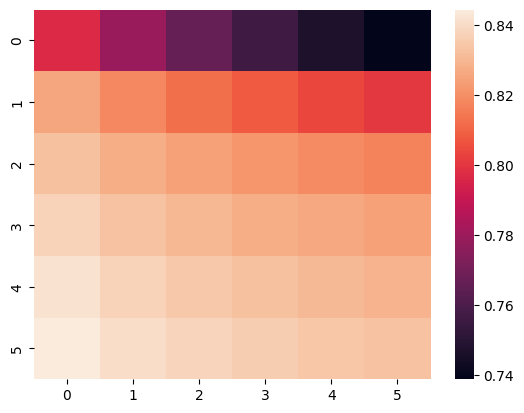

In [ ]:
sns.heatmap(data = R2trainScore)

In [ ]:
R2adjtrainScore

array([[ 0.79264932,  0.77495745,  0.76191368,  0.75110787,  0.74174385,
         0.7334087 ],
       [ 0.80819008,  0.80007628,  0.79381001,  0.78872884,  0.78444621,
         0.78072282],
       [ 0.7603583 ,  0.75356582,  0.74875571,  0.7447859 ,  0.74132069,
         0.73821522],
       [ 0.06087143,  0.03479095,  0.01738857,  0.0039189 , -0.00729492,
        -0.01703993],
       [ 1.16090498,  1.16506132,  1.16794102,  1.17018452,  1.1720386 ,
         1.17362942],
       [ 1.0471707 ,  1.04829593,  1.04906289,  1.04967314,  1.05018751,
         1.05063468]])

<Axes: >

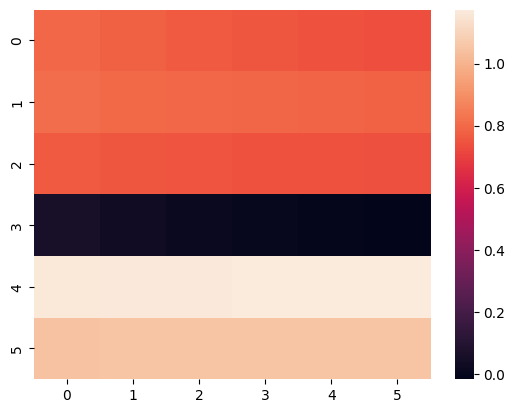

In [ ]:
sns.heatmap(data = R2adjtrainScore)

# **Check Assumptions of Linear Regression**

## VIF

* Below is Iterative code for auto removing High VIF features by maintaing threshold for VIF<=5 [iterates code till none of features VIF >5

In [ ]:
vif_thr =5
r2_thr = 0 # focusing only on VIF irrepsctive of feature removal effect on R-Square Adj
j = 1
feats_removed = []
cols2 = Xtrain.columns
while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(Xtrain, columns=Xtrain.columns)[cols2]
    vif['Features'] = cols2
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    cols2 = vif["Features"][1:].values
    X2 = pd.DataFrame(Xtrain, columns=Xtrain.columns)[cols2] #Dropped the feature with high VIF & Again check Perfromance of the reamining data

    X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
    sm_model = sm.OLS(list(ytrain), X2_sm).fit()
    if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
        print('Reached threshold')
        print('Highest vif:',vif.iloc[0])
        print('Current adj.R2',sm_model.rsquared_adj)
        print('Features removed:', j-1)
        print('List of features removed:', feats_removed)
        break
    feats_removed.append(vif.iloc[0]['Features']) # Addting the high VIF removed feature name to feats_removed
    j += 1
print()
print("*******************************************************************************************************************************")
print()
# Final Assesment of Data after removing all possible high VIF feature with set Threshold values
print(vif)
print(sm_model.summary())

Reached threshold
Highest vif: Features    TOEFL Score
VIF                 2.4
Name: 0, dtype: object
Current adj.R2 0.2944776426559609
Features removed: 5
List of features removed: ['CGPA', 'GRE Score', 'SOP', 'LOR', 'University Rating']

*******************************************************************************************************************************

      Features  VIF
0  TOEFL Score  2.4
1     Research  2.4
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     167.5
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           3.16e-32
Time:                        09:50:19   Log-Likelihood:                 290.08
No. Observations:                 400   AIC:                            -576.2
Df Residuals:     

* By focusing only on VIF Score < 5 -->  five Feaures ['CGPA', 'GRE Score', 'SOP', 'LOR', 'University Rating'] have been Removed
* As a results Rsqure_adj of the model came down to 0.294 --> Not a good Model for Prediction

* Now we will focus both on VIF & R-Square Adj

* Below is Iterative code for auto removing High VIF features by maintaing threshold for **VIF<=5 & Rsquare_adj >=0.8**

In [ ]:
vif_thr =5
r2_thr = 0.8
j = 1
feats_removed = []
cols2 = Xtrain.columns
while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(Xtrain, columns=Xtrain.columns)[cols2]
    vif['Features'] = cols2
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    if j == 1:
        print("****************************")
        print("Initial Condition")
        print("****************************")
        print(vif)
        print()

    cols2 = vif["Features"][1:].values
    X2 = pd.DataFrame(Xtrain, columns=Xtrain.columns)[cols2] #Dropped the feature with high VIF & Again check Perfromance of the reamining data

    X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
    sm_model = sm.OLS(list(ytrain), X2_sm).fit()
    if (vif.iloc[0]['VIF'] <= vif_thr) or (sm_model.rsquared_adj < r2_thr):

        print("Checking VIF")
        print("****************************")
        print('Reached threshold')
        print('Highest vif :',vif.iloc[0])
        print('Current adj.R2 if Highest VIF feature removed:',sm_model.rsquared_adj)
        print('Features removed :', j-1)
        print('List of features removed :', feats_removed)
        break
    feats_removed.append(vif.iloc[0]['Features']) # Addting the high VIF removed feature name to feats_removed
    j += 1
print("***************************************************************************")
print()
# Final Assesment of Data after removing all possible high VIF feature with set Threshold values

****************************
Initial Condition
****************************
            Features     VIF
5               CGPA  787.90
1        TOEFL Score  692.63
0          GRE Score   76.82
3                SOP   32.95
4                LOR   30.81
2  University Rating   20.59
6           Research    3.32

Checking VIF
****************************
Reached threshold
Highest vif : Features     CGPA
VIF         787.9
Name: 5, dtype: object
Current adj.R2 if Highest VIF feature removed: 0.7766781427005298
Features removed : 0
List of features removed : []
***************************************************************************



* CGPA  Score has very high VIF values
* But removal of these features is detoriating our Model,Bringing down Rsquare_adj to 0.777 which is less than threshold < 0.8

## Mean of Residuals

In [ ]:
np.mean(yhattrain-ytrain)

-4.929390229335695e-16

In [ ]:
np.mean(yhattest-ytest)

0.006100917484111618

* Mean of Residuals are almost equivalent to Zero

## Linearity of variables

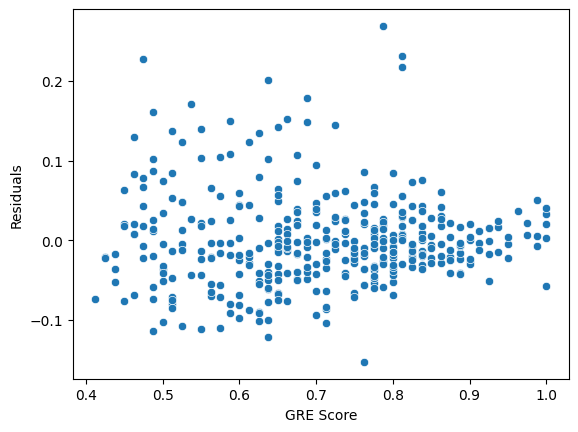

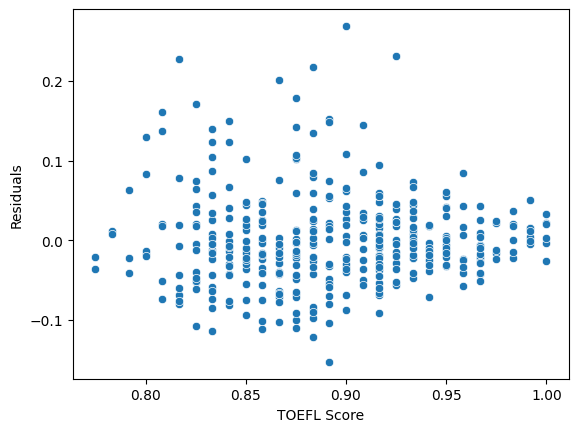

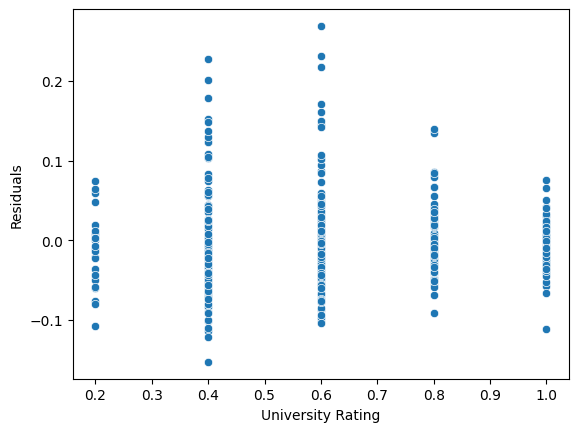

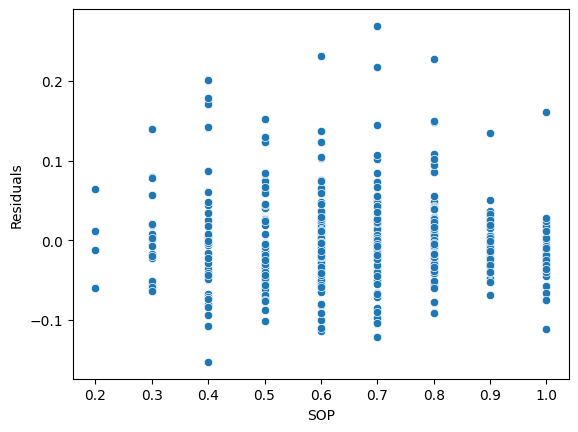

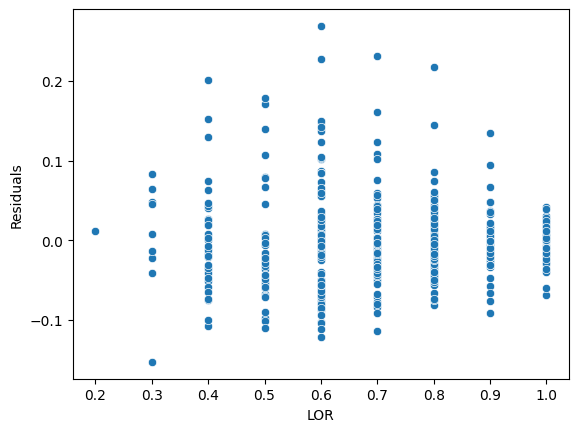

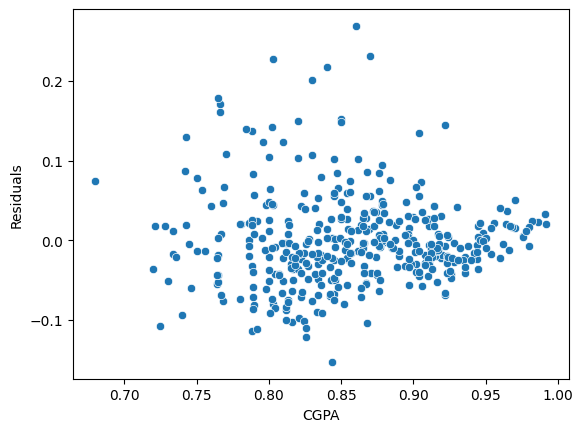

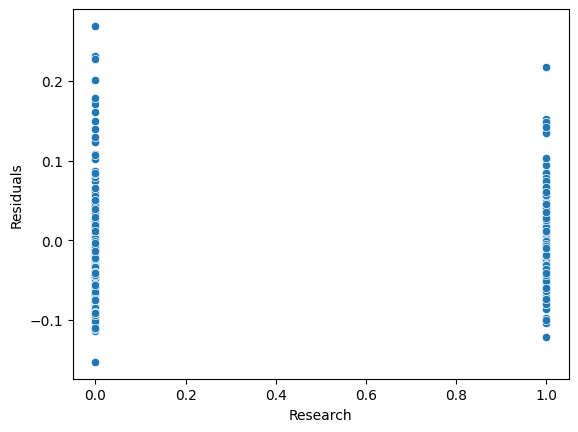

In [ ]:
for i in Xtrain.columns:
  sns.scatterplot(x=Xtrain[i],y=(yhattrain-ytrain))
  plt.xlabel(i)
  plt.ylabel("Residuals")
  plt.show()

* We can say No Rigid pattern observed for Residual w.r.t Features

## No Heteroskedasticity

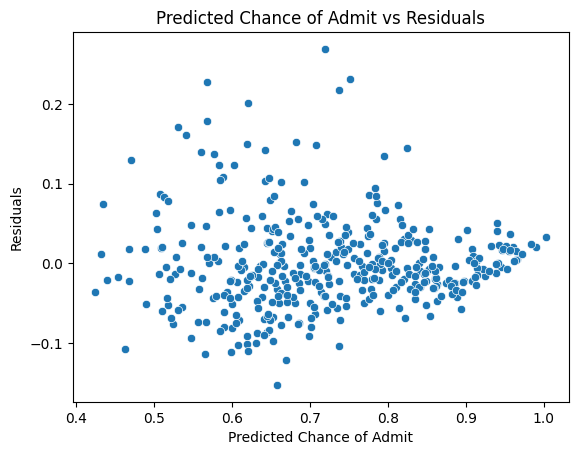

In [ ]:
sns.scatterplot(x=yhattrain,y=yhattrain-ytrain)
plt.xlabel("Predicted Chance of Admit")
plt.ylabel("Residuals")
plt.title("Predicted Chance of Admit vs Residuals")
plt.show()

* Very Slight Heteroskedasticity is Present
* we can say variance is almost same for all data points

## Normality of Residuals

<Axes: ylabel='Count'>

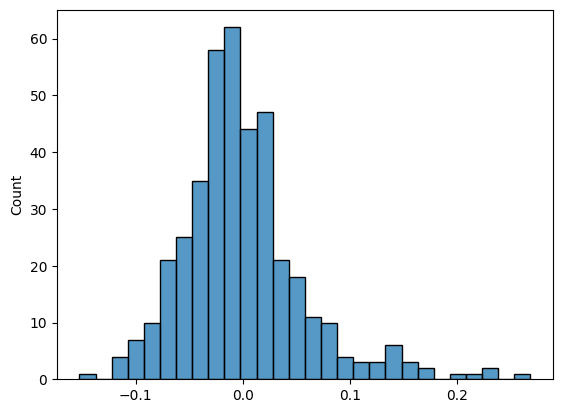

In [ ]:
sns.histplot(yhattrain-ytrain)

lets check Normality with Shapiro test

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian

test_stat, p_value = shapiro(yhattrain-ytrain)
print(p_value)
if p_value < 0.05:
   print("Reject H0")
   print("Residuals are Not Gaussian")
else:
   print("Fail to reject H0")
   print("Residuals are Gaussian")

1.367908715986521e-12
Reject H0
Residuals are Not Gaussian


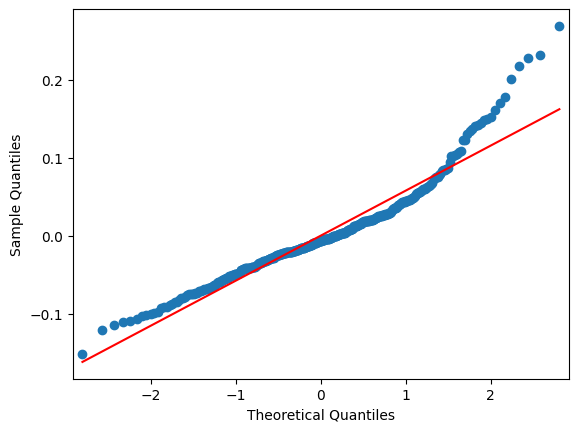

In [ ]:
trainresiduals = (yhattrain-ytrain)
qqplot(trainresiduals, line="s")
plt.show()

* Residuals are not Following Normality

# **Bussiness Insights**

* The DataSet provided is between 2018-09-12 00:00:16.535741 & 2018-10-03 23:59:42.701692
* Training : Test Data Ratio use = 72:28
* 60% trips are of Cart Types, rest are of FTL type
* Trip creations are lowest in the Noon and Starts to increase and reaches peak in midnight
* More Number of Trip are created in the moiddle of the month and Number of trips are less at start and End of month
* There is not much effect of Week ina month for trip Creation
* Top 5 Source States:Maharastra,Karnataka,Harayana,Tamilnadu,Delhi
* Top 5 destination States: Maharastra,Karnataka,Harayana,Tamilnadu,Telangana
* Top5 Source Cities:Bengaluru,Gurgoan,Mumbai,Bhiwandi,Delhi
* Top5 Destination Cities: Bengaluru,Mumbai,Gurgoan,Hyderabad,Bhiwandi

* "od_total_time" is greater than "start_scan_to_end_scan" for a given trip_uuid
* "actual_time" is always greater than "osrm_time" for a given trip_uuid
* "actual_time" & "segment_actual_time" have approx same mean for a given trip_uuid
* "osrm_distance" is less than "segment_osrm_distance" for a given trip_uuid
* "osrm_time" is less than "segment_osrm_time" for a given trip_uuid
* "actual_distance_to_destination" is less than "osrm_distance" for a given trip_uuid

# **Recommendations**

* Major Traffic is found in Maharastra, Karnataka,Haryana --> Appropriate infrastructure & Manpower needs to be maintained to reduce logitics Delays
* Carting Type Trip from among manjor Cities (Bengaluru, Gurugaon,Mumbai,Hyderabad,Delhi,Bhiwandi) can be Converted to FTL by delhivery to further Optimize the Total trip Duration
* High Trip Creation goes on during night time, & in the middle of the month, so appropriate Resource to be maintained to reduce process bottle Necks
* Actual Trip Time is alwasy greater than Osrm predicted time, so Accordingly Buffer to be added , so that no false commitment at customer end
* Actual Distance_to_Destination is statistically lower than osrm distance, so correction might be needed for distance calculation so that price of trip can be optimised according & best value can be given to customer